# Classifying Risk of Cervical Cancer

## Librairies Import

In [ ]:
# !pip install pandas_profiling
# !pip install gif
# !pip install lazypredict

In [ ]:
import pandas_profiling as pp
from lazypredict.Supervised import LazyClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import Perceptron, SGDClassifier, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold
from scipy import stats
# For plotting Gaussian contours
#from plotting_utils import plot_gaussian_from_points
#from plotting_utils import plot_gaussian_from_parameters
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## Data Description

https://www.kaggle.com/code/naveenram/ml-models-for-prediction-of-cervical-cancer/data

In [ ]:
df=pd.read_csv("df_imputation.csv")

pd.set_option('display.max_columns', 40)
df.head(10)

,Unnamed: 0,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,IUD,IUD_years,STDs,STDs_number,STDs_condylomatosis,STDs_cervical_condylomatosis,STDs_vaginal_condylomatosis,STDs_vulvo_perineal_condylomatosis,STDs_syphilis,STDs_pelvic_inflammatory_disease,STDs_genital_herpes,STDs_molluscum_contagiosum,STDs_AIDS,STDs_HIV,STDs_Hepatitis_B,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,18,4.00,15.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0
1,1,15,1.00,14.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0
2,3,52,5.00,16.00,4.00,1.00,37.00,37.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0,0,0
3,4,46,3.00,21.00,4.00,0.00,0.00,0.00,1.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0
4,5,42,3.00,23.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0
5,6,51,3.00,17.00,6.00,1.00,34.00,3.40,0.00,0.00,1.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,1,1,0,1
6,7,26,1.00,26.00,3.00,0.00,0.00,0.00,1.00,2.00,1.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0
7,8,45,1.00,20.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,1,1,0,0,0,0
8,9,44,3.00,15.00,8.00,1.00,1.27,2.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0
9,10,44,3.00,26.00,4.00,0.00,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,Unnamed: 0,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,IUD,IUD_years,STDs,STDs_number,STDs_condylomatosis,STDs_cervical_condylomatosis,STDs_vaginal_condylomatosis,STDs_vulvo_perineal_condylomatosis,STDs_syphilis,STDs_pelvic_inflammatory_disease,STDs_genital_herpes,STDs_molluscum_contagiosum,STDs_AIDS,STDs_HIV,STDs_Hepatitis_B,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00
mean,427.85,26.81,2.51,17.00,2.27,0.15,1.22,0.45,0.69,2.36,0.10,0.45,0.09,0.15,0.05,0.00,0.00,0.05,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.08,0.02,0.01,0.02,0.03,0.04,0.09,0.05,0.06
std,246.56,8.53,1.59,2.81,1.45,0.35,4.09,2.23,0.46,3.81,0.30,1.82,0.29,0.52,0.22,0.00,0.07,0.22,0.14,0.03,0.03,0.03,0.00,0.14,0.03,0.05,0.30,0.14,0.10,0.14,0.16,0.20,0.28,0.22,0.25
min,0.00,13.00,1.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,215.25,20.00,2.00,15.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,427.50,25.00,2.00,17.00,2.00,0.00,0.00,0.00,1.00,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,639.75,32.00,3.00,18.00,3.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,857.00,84.00,28.00,32.00,11.00,1.00,37.00,37.00,1.00,30.00,1.00,19.00,1.00,4.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


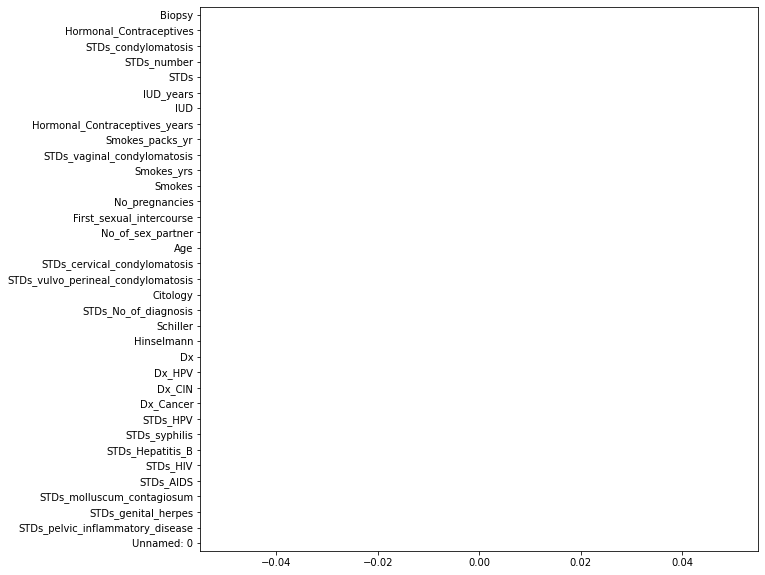

In [ ]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

Les 838 patientes sont identifiées et décrites via les 34 variables (comportement sexuel, statut tabagique, contraceptif, IST, examens médicaux).

La patiente moyenne a 26 ans, a eu 2.5 partenaires sexuels dans sa vie, a eu son premier rapport à 17 ans. Elle a entre 2 et 3 enfants, a fumé pendant 1.21 ans, fume 0.45 packets par an. Elle suit une contraception hormonale sur 2.35 ans, a eu très peu voir pas d'IST et a reçu peu d'examens médicaux. 

## Univariate Descriptive Statistics

### Diagnostic Cancer

In [ ]:
# df["Qty_smoked"] = df["Smokes_yrs"] * df["Smokes_packs_yr"] # trop grosse echelle
# df["Interaction_smokes_Hormonal_Contraceptives"] = df["Smokes"] * df["Hormonal_Contraceptives"] # on delete pcq ca va faire une variable discrete dans gibbs

In [ ]:
df[df['Dx_Cancer']==1].describe()

,Unnamed: 0,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,IUD,IUD_years,STDs,STDs_number,STDs_condylomatosis,STDs_cervical_condylomatosis,STDs_vaginal_condylomatosis,STDs_vulvo_perineal_condylomatosis,STDs_syphilis,STDs_pelvic_inflammatory_disease,STDs_genital_herpes,STDs_molluscum_contagiosum,STDs_AIDS,STDs_HIV,STDs_Hepatitis_B,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00
mean,503.00,32.94,2.76,18.06,2.65,0.12,2.82,2.19,0.71,3.60,0.29,1.47,0.12,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.06,1.00,0.00,0.88,0.76,0.24,0.35,0.24,0.35
std,329.35,8.40,1.44,1.71,1.37,0.33,9.20,8.97,0.47,5.21,0.47,2.62,0.33,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.24,0.00,0.00,0.33,0.44,0.44,0.49,0.44,0.49
min,3.00,19.00,1.00,14.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,188.00,27.00,2.00,18.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
50%,610.00,31.00,3.00,18.00,2.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
75%,775.00,38.00,3.00,19.00,4.00,0.00,0.00,0.00,1.00,6.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00
max,849.00,52.00,6.00,20.00,5.00,1.00,37.00,37.00,1.00,16.00,1.00,8.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00


There is a type !!! : a women affected from cervix cancer is smoking 37 packs per years for 37 years

we change this value to the mean value for packs per years consumed from the dataset of healthy patients.

In [ ]:
value_for_outlier = df[(df['Dx_Cancer']==0)&(df['Smokes_yrs']>=20)].mean()['Smokes_packs_yr']
old_descriptors = np.array(df[(df['Dx_Cancer']==1)&(df['Smokes_yrs']==37)&(df['Smokes_packs_yr']==37)])[0]
old_descriptors[7] = value_for_outlier
df[(df['Dx_Cancer']==1)&(df['Smokes_yrs']==37)&(df['Smokes_packs_yr']==37)] = old_descriptors.copy()

In [ ]:
df[df['Dx_Cancer']==1].describe()

,Unnamed: 0,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,IUD,IUD_years,STDs,STDs_number,STDs_condylomatosis,STDs_cervical_condylomatosis,STDs_vaginal_condylomatosis,STDs_vulvo_perineal_condylomatosis,STDs_syphilis,STDs_pelvic_inflammatory_disease,STDs_genital_herpes,STDs_molluscum_contagiosum,STDs_AIDS,STDs_HIV,STDs_Hepatitis_B,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00
mean,503.00,32.94,2.76,18.06,2.65,0.12,2.82,0.50,0.71,3.60,0.29,1.47,0.12,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.06,1.00,0.00,0.88,0.76,0.24,0.35,0.24,0.35
std,329.35,8.40,1.44,1.71,1.37,0.33,9.20,2.04,0.47,5.21,0.47,2.62,0.33,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.24,0.00,0.00,0.33,0.44,0.44,0.49,0.44,0.49
min,3.00,19.00,1.00,14.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,188.00,27.00,2.00,18.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
50%,610.00,31.00,3.00,18.00,2.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
75%,775.00,38.00,3.00,19.00,4.00,0.00,0.00,0.00,1.00,6.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00
max,849.00,52.00,6.00,20.00,5.00,1.00,37.00,8.40,1.00,16.00,1.00,8.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
df[df['Dx_Cancer']==0].describe()

,Unnamed: 0,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,IUD,IUD_years,STDs,STDs_number,STDs_condylomatosis,STDs_cervical_condylomatosis,STDs_vaginal_condylomatosis,STDs_vulvo_perineal_condylomatosis,STDs_syphilis,STDs_pelvic_inflammatory_disease,STDs_genital_herpes,STDs_molluscum_contagiosum,STDs_AIDS,STDs_HIV,STDs_Hepatitis_B,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00,821.00
mean,426.29,26.69,2.50,16.97,2.26,0.15,1.18,0.41,0.69,2.33,0.09,0.42,0.09,0.15,0.05,0.00,0.00,0.05,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.09,0.00,0.01,0.00,0.01,0.04,0.08,0.05,0.06
std,244.58,8.49,1.59,2.83,1.45,0.35,3.92,1.85,0.46,3.77,0.29,1.80,0.29,0.52,0.22,0.00,0.07,0.22,0.14,0.03,0.03,0.03,0.00,0.14,0.03,0.00,0.30,0.00,0.10,0.05,0.11,0.19,0.27,0.21,0.23
min,0.00,13.00,1.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,216.00,20.00,2.00,15.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,425.00,25.00,2.00,17.00,2.00,0.00,0.00,0.00,1.00,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,636.00,32.00,3.00,18.00,3.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,857.00,84.00,28.00,32.00,11.00,1.00,34.00,22.00,1.00,30.00,1.00,19.00,1.00,4.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,3.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


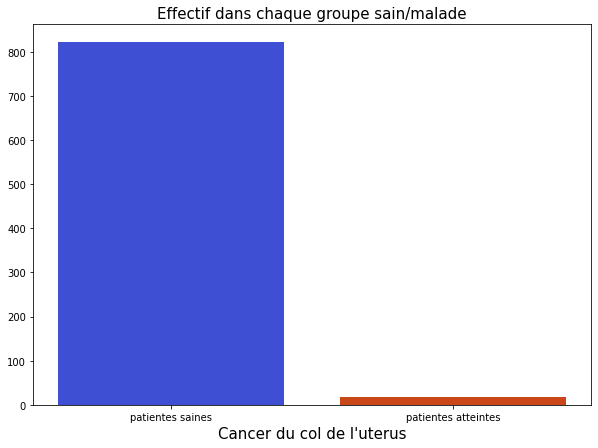

In [ ]:
Orange_Roughy = (201/255, 71/255, 24/255) # "#C94718"
Asphalt = (16/255, 5/255, 5/255)
Cerulean_Blue = (62/255, 79/255, 212/255) # "#3E4FD4"
Fruit_Salad = (93/255, 154/255, 78/255)

plt.figure(figsize=(10,7))

plt.bar(x = ["patientes saines", "patientes atteintes"], height = [len(df[df["Dx_Cancer"]==0]), len(df[df["Dx_Cancer"]==1])], color = [Cerulean_Blue, Orange_Roughy])
plt.xlabel("Cancer du col de l'uterus", fontsize = 15)

plt.title("Effectif dans chaque groupe sain/malade", fontsize = 15)
plt.show();

# sns.set(rc={'figure.figsize':(11.7,8.27)})
# ax=sns.countplot(x="Dx_Cancer", data=df, palette="Set3").set(xlabel='Cervical Cancer', ylabel='Count', title='Countplot of Cervical Cancer')

First problem: Classification with highly unbalanced data :D

In [ ]:
def proportion(df, col):
    df=df[col].value_counts(normalize=True) * 100
    df=df.to_frame()
    df.reset_index(inplace=True)
    df.columns=[col, '%']
    return df
    
proportion(df, 'Dx_Cancer')

,Dx_Cancer,%
0,0.00,97.97
1,1.00,2.03


La variable à prédire représente 2% 

### Age

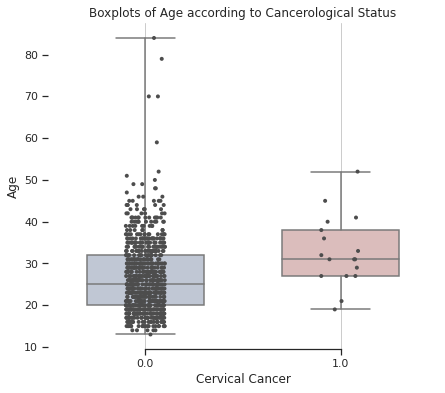

In [ ]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax=plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Dx_Cancer", y="Age", data=df,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="Dx_Cancer", y="Age", data=df,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Age", xlabel="Cervical Cancer", title="Boxplots of Age according to Cancerological Status")
sns.despine(trim=True, left=True)

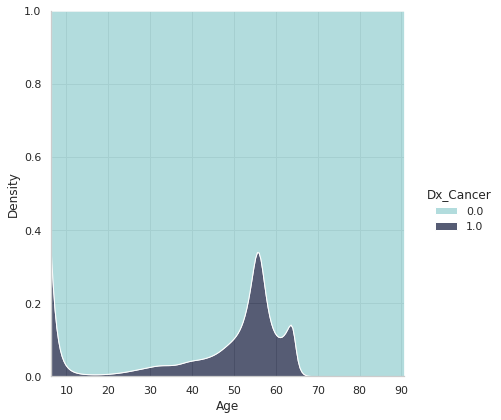

In [ ]:
sns.set_theme(style="whitegrid")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=df,
    x="Age", hue="Dx_Cancer",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

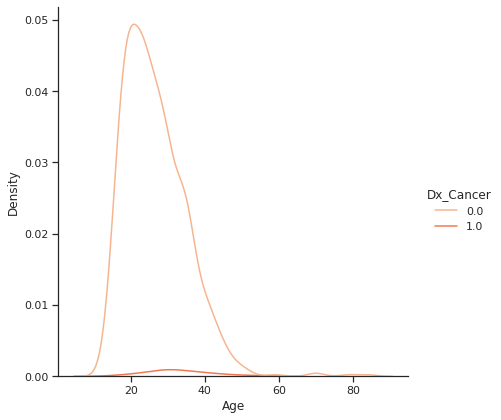

In [ ]:
# Plot the distribution of clarity ratings, conditional on carat
sns.set_theme(style="ticks")

sns.set_palette("rocket_r")

sns.displot(
    data=df,
    x="Age",
    hue='Dx_Cancer',
    kind='kde', height=6
)

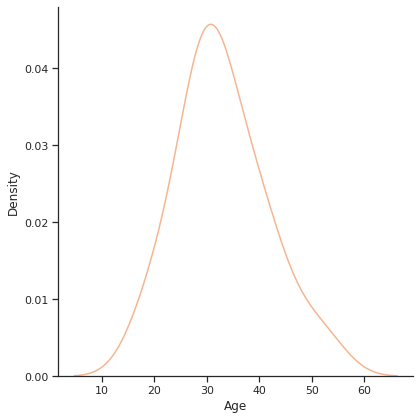

In [ ]:
sns.set_theme(style="ticks")

sns.set_palette("rocket_r")

sns.displot(
    data=df[df['Dx_Cancer']==1],
    x="Age",
    kind='kde', height=6
)

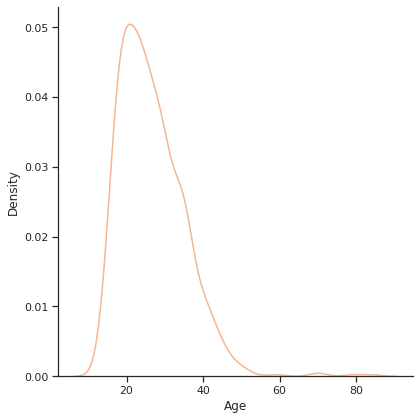

In [ ]:
sns.set_theme(style="ticks")

sns.set_palette("rocket_r")

sns.displot(
    data=df[df['Dx_Cancer']==0],
    x="Age",
    kind='kde', height=6
)

### Number of Sexual Partners

### Number of Pregnancies

### Smoking Status

### Contraceptives

### STDS

## Bivariate Descriptive Analysis

### Inferential Analysis

In [ ]:
#define F-test function
def f_test(x, y):
    x=np.array(x)
    y=np.array(y)
    f=np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn=x.size-1 #define degrees of freedom numerator 
    dfd=y.size-1 #define degrees of freedom denominator 
    p=1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

#### Age

- T-Test
- Mann Whitney U Test:
  non parametric version of ttest, more adapted to small set of observation (especially Dx_cancer==1). 
  
  Adapted for not normally distrubuted data. 

  **==>** non parametric test to avoid type I error 
  
  **H0 : les distribution sont les memes**, pval < 5% **==>** H0 rejetee
- F-Test

In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD',
       'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis',
       'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis',
       'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis',
       'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes',
       'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV',
       'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer',
       'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology',
       'Biopsy'],
      dtype='object')

Age
Les distributions de la variable Age entre les classes de patientes saines/atteintes sont les memes ? False - pvalue=0.0009515480773620686

Les moyennes de la variable Age entre les classes de patientes saines/atteintes sont les memes ? False - pvalue=0.007541009483767115

Les variances de la variable Age entre les classes de patientes saines/atteintes sont les memes ? True - pvalue=0.5220542044142771

Patientes saines:      Moyenne = 26.685749086479902 - Variance = 71.99625245348577
Patientes atteintes:   Moyenne = 32.94117647058823 - Variance = 66.4083044982699


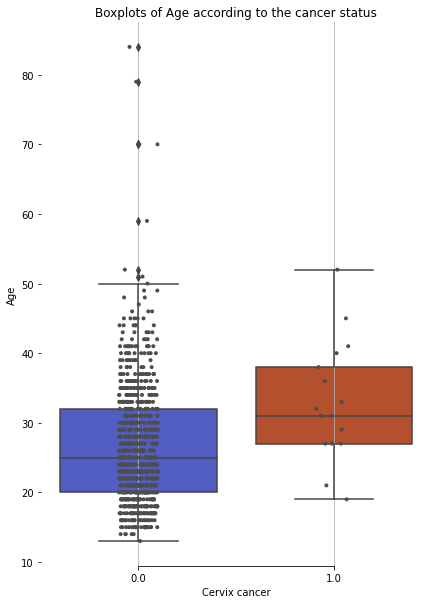




No_of_sex_partner
Les distributions de la variable No_of_sex_partner entre les classes de patientes saines/atteintes sont les memes ? True - pvalue=0.19048682112177856

Les moyennes de la variable No_of_sex_partner entre les classes de patientes saines/atteintes sont les memes ? True - pvalue=0.46777502237841684

Les variances de la variable No_of_sex_partner entre les classes de patientes saines/atteintes sont les memes ? True - pvalue=0.3315663106751645

Patientes saines:      Moyenne = 2.502436053593179 - Variance = 2.529835722159335
Patientes atteintes:   Moyenne = 2.764705882352941 - Variance = 1.9446366782006919



First_sexual_intercourse
Les distributions de la variable First_sexual_intercourse entre les classes de patientes saines/atteintes sont les memes ? False - pvalue=0.002350256392816301

Les moyennes de la variable First_sexual_intercourse entre les classes de patientes saines/atteintes sont les memes ? False - pvalue=0.020622733794324565

Les variances de la variable

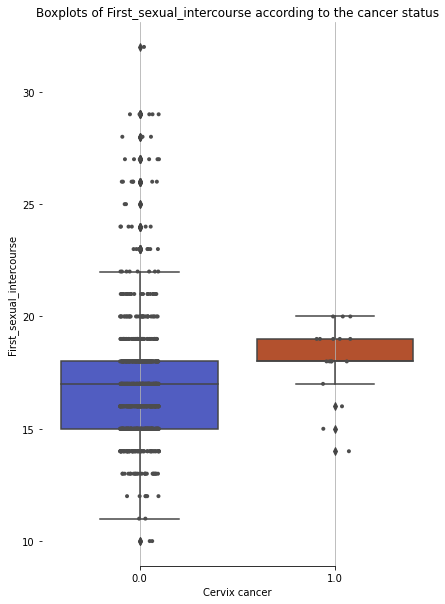




No_pregnancies
Les distributions de la variable No_pregnancies entre les classes de patientes saines/atteintes sont les memes ? True - pvalue=0.08547581524024467

Les moyennes de la variable No_pregnancies entre les classes de patientes saines/atteintes sont les memes ? True - pvalue=0.2682581044916694

Les variances de la variable No_pregnancies entre les classes de patientes saines/atteintes sont les memes ? True - pvalue=0.41267882711527837

Patientes saines:      Moyenne = 2.2630937880633373 - Variance = 2.1086135709845544
Patientes atteintes:   Moyenne = 2.6470588235294117 - Variance = 1.7577854671280277



Smokes_yrs
Les distributions de la variable Smokes_yrs entre les classes de patientes saines/atteintes sont les memes ? True - pvalue=0.4266770442717889

Les moyennes de la variable Smokes_yrs entre les classes de patientes saines/atteintes sont les memes ? True - pvalue=0.4737541314350554

Les variances de la variable Smokes_yrs entre les classes de patientes saines/atteint

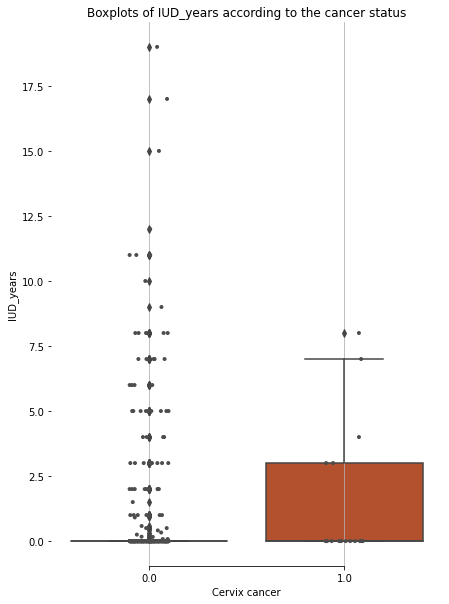




STDs_number
Les distributions de la variable STDs_number entre les classes de patientes saines/atteintes sont les memes ? True - pvalue=0.3813786741103733

Les moyennes de la variable STDs_number entre les classes de patientes saines/atteintes sont les memes ? True - pvalue=0.6803018681898003

Les variances de la variable STDs_number entre les classes de patientes saines/atteintes sont les memes ? False - pvalue=0.017296510592107794

Patientes saines:      Moyenne = 0.15225334957369063 - Variance = 0.27523548270802517
Patientes atteintes:   Moyenne = 0.11764705882352941 - Variance = 0.10380622837370242



STDs_No_of_diagnosis
Les distributions de la variable STDs_No_of_diagnosis entre les classes de patientes saines/atteintes sont les memes ? True - pvalue=0.3664161448944443

Les moyennes de la variable STDs_No_of_diagnosis entre les classes de patientes saines/atteintes sont les memes ? True - pvalue=0.6635908778527388

Les variances de la variable STDs_No_of_diagnosis entre les cl

In [ ]:
of_interest = ['Age', 
'No_of_sex_partner', 
'First_sexual_intercourse',
'No_pregnancies',
'Smokes_yrs', 
'Smokes_packs_yr',
'Hormonal_Contraceptives_years', 
'IUD_years', 
'STDs_number',
'STDs_No_of_diagnosis']

for variable in of_interest:

    print(variable)

    ttest_stat, ttest_pvalue = stats.ttest_ind(df[df['Dx_Cancer']==0][variable], df[df['Dx_Cancer']==1][variable], equal_var=False)
    utest_stat, utest_pvalue = stats.mannwhitneyu(df[df['Dx_Cancer']==0][variable], df[df['Dx_Cancer']==1][variable]) 
    mean_0 = np.mean(df[df['Dx_Cancer']==0][variable])
    mean_1 = np.mean(df[df['Dx_Cancer']==1][variable])
    ftest_stat, ftest_pvalue = f_test(df[df['Dx_Cancer']==0][variable], df[df['Dx_Cancer']==1][variable])
    var_0 = np.var(df[df['Dx_Cancer']==0][variable])
    var_1 = np.var(df[df['Dx_Cancer']==1][variable])

    print(f"Les distributions de la variable {variable} entre les classes de patientes saines/atteintes sont les memes ? {utest_pvalue >= 0.05} - pvalue={utest_pvalue}\n")
    print(f"Les moyennes de la variable {variable} entre les classes de patientes saines/atteintes sont les memes ? {ttest_pvalue >= 0.05} - pvalue={ttest_pvalue}\n")
    print(f"Les variances de la variable {variable} entre les classes de patientes saines/atteintes sont les memes ? {ftest_pvalue >= 0.05} - pvalue={ftest_pvalue}\n")
    print(f"Patientes saines:      Moyenne = {mean_0} - Variance = {var_0}")
    print(f"Patientes atteintes:   Moyenne = {mean_1} - Variance = {var_1}")

    if not(utest_pvalue >= 0.05):
        # Initialize the figure with a logarithmic x axis
        f, ax = plt.subplots(figsize=(7, 10))

        my_pal = {0: "#3E4FD4", 1: "#C94718"}

        # Plot the orbital period with horizontal boxes
        sns.boxplot(x="Dx_Cancer", y=variable, data=df, palette = my_pal)

        # Add in points to show each observation
        sns.stripplot(x="Dx_Cancer", y=variable, data=df, size=4, color=".3", linewidth=0)

        # Tweak the visual presentation
        ax.xaxis.grid(True)
        ax.set(ylabel=variable, xlabel="Cervix cancer", title=f"Boxplots of {variable} according to the cancer status")
        sns.despine(trim=True, left=True)

        plt.show()

    print("\n\n")

### Correlation Analysis

In [ ]:
df_quanti=df[of_interest]

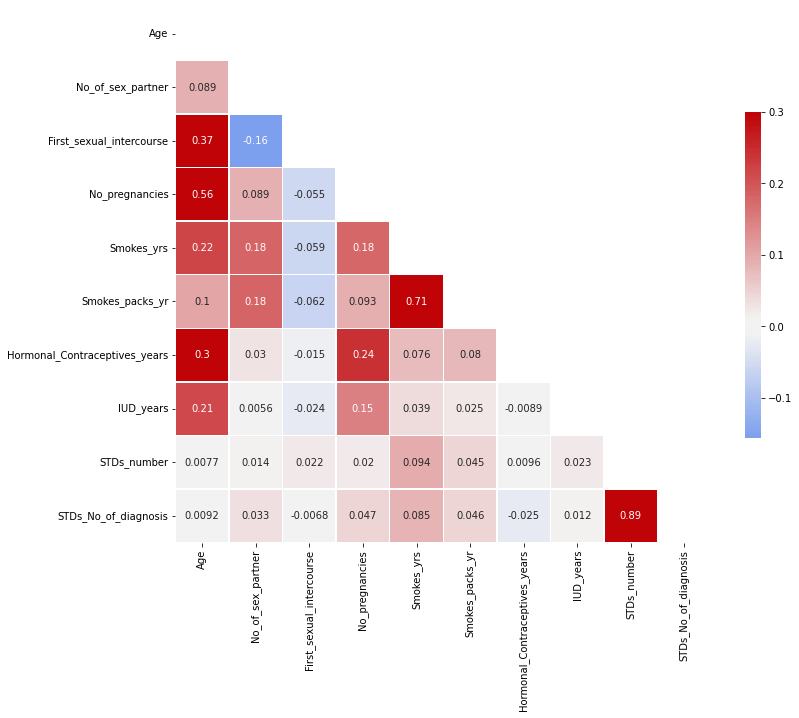

In [ ]:
# Compute the correlation matrix
corr=df_quanti.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
# sns.choose_diverging_palette()
cmap=sns.diverging_palette(262, 12, s=99, l = 40, sep = 10, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
Gibbs_variables = [
 'Age',
 'First_sexual_intercourse',
 'No_pregnancies',
 'Smokes_yrs',
 'Smokes_packs_yr',
 'Hormonal_Contraceptives_years',
 'IUD_years'
 ]

Pour l'algoritme de Gibbs on n'utilise que les paires de variables "fortement correlees".


On doit par la suite verifier que les distributions de chacunes des variables selectionnees entre 
- les donnees reelles de patientes atteintes 

VS. 

- les donnees generees pour des patientes atteintes

sont similaires.

### Joint Distribution Analysis

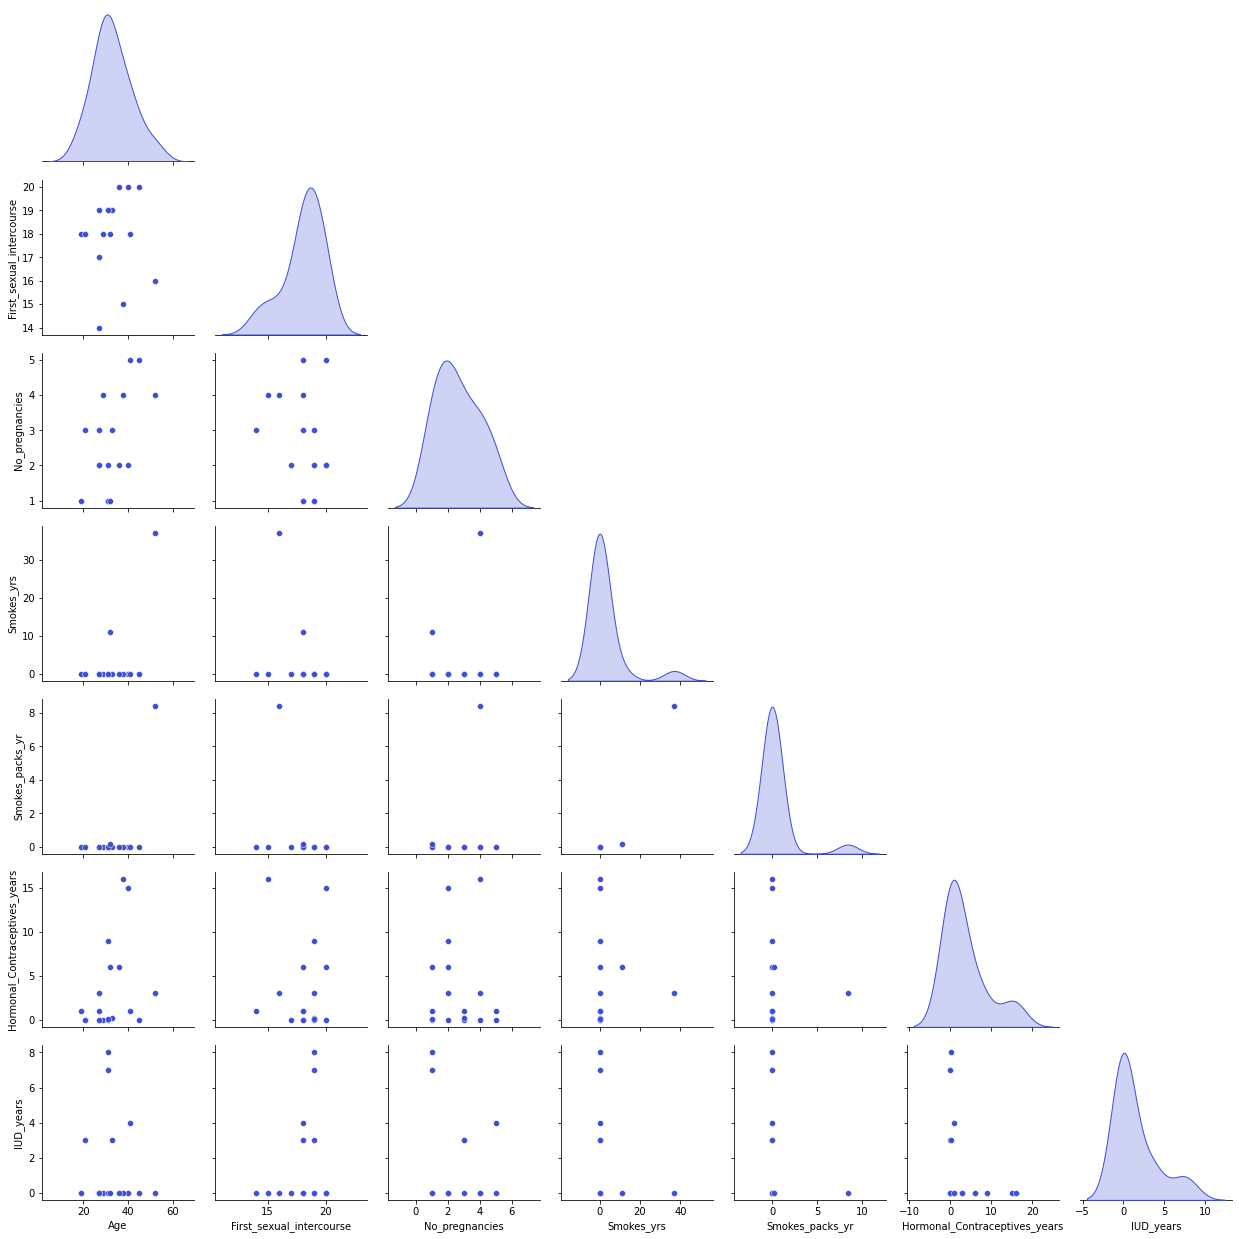

In [ ]:
sns.pairplot(df[df['Dx_Cancer']==1][Gibbs_variables], corner=True, plot_kws=dict(color = "#3E4FD4"), diag_kws=dict(color = "#3E4FD4"), diag_kind = "kde")

### Monte Carlo Simulation Conditional Distribution

Code from https://mr-easy.github.io/2020-05-21-implementing-gibbs-sampling-in-python/

##### Set Algorithm

In [ ]:
''' DESCRIPTION:

"In statistics, Gibbs sampling or a Gibbs sampler is a Markov chain Monte Carlo (MCMC) randomized algorithm for obtaining a sequence of observations which are approximated from a specified multivariate probability distribution,
when direct sampling is difficult." (source: Wikipedia). We inspect the pair of random variables that are the most correlated in our WHOLE dataset (for Cancer and Non-Cancer) to synthezise data in
the Cancer subgroup (cf. Correlation Analysis hereinabove).

For X_1 and X_2 highly correlated, we suppose that X_2 can help predict X_1. The rationale of the algorithm is thus to draw the random variable X_1 k times from the joint distribution (X_1, X_2) that we use to then compute the
conditional distribution p(X_1|X_2). X_1~p(X_1|X_2) approximatively

                1. Inputs
                  'initial_point': a vector of coordinates in R^2 specifying the position of the initial point at which the sampling is performed
                  'num_samples': the number of samples desired as an output
                  'mean': the vector of means in R^2 of the pair of variables we want to Gibbs sample 'num_samples' times
                  'cov': the definite positive matrix in M(2,2) of variance-covariance of the pair of variables we want to Gibbs sample 'num_samples' times
                  'sampling_index': the index of the point we sample conditionally on another point i.e. sampling_index = 0 if we sample x_0 from p(x_0|x_1)
                  'current_x': the value of the variable used as conditionner at step t=k i.e. x_1 for the previous example (since it's an iterative process)

                2. Output
                  the 'num_samples' samples

                3. Procedure
                  Initilization
                  t=0
                    - define the initial point of coordinates initial_point[0] and initial_point[1]
                    - define the vector of coordinates in R^2 of num_samples samples
                    - define the first observation of the vector of samples as the initial point

                  Loop
                  t=1
                    - define x_ 0 as a RANDOM variable generated by the distribution p(x_0|x_1). For that we firstly compute the expectation of such distribution as the sum of 
                      the mean of x_0 and the standardised x_1 conditionned on x_0 i.e. we shift E[x_0] in the direction of the difference between the covariance of x_0 and x_1 and the expectation of x_1:

                                                            E[x_0] + ( Cov(x_0,x_1)*x_1 - E[x_1] )/Var(x_1)


                      We then compute the dispersion parameter of the conditional distribution as the root square of:

                                                            ( Var(x_0)- Cov(x_0,x_1)^2 )/Var(x_1)

                      t=2
                        - use the updated x_0 as conditionner for x_1

'''
def gibbs_sampler(initial_point, num_samples):
    x_0=initial_point[0]
    x_1=initial_point[1]
    samples=np.empty([num_samples+1, 2])  #sampled points
    samples[0]=[x_0, x_1]

    for i in range(num_samples):

        # Sample from p(x_0|x_1)
        x_0=conditional_sampler(sampling_index=0, condition_on=x_1)

        # Sample from p(x_1|x_0)
        x_1=conditional_sampler(sampling_index=1, condition_on=x_0)
  
        samples[i+1]=[x_0, x_1]

    return samples

In [ ]:
def conditional_sampler(sampling_index, current_x, mean, cov):
    conditioned_index=1 - sampling_index 
    # The above line works because we only have 2 variables, x_0 & x_1
    a=cov[sampling_index, sampling_index]
    b=cov[sampling_index, conditioned_index]
    c=cov[conditioned_index, conditioned_index]
  
    mu=mean[sampling_index] + (b * (current_x[conditioned_index] - mean[conditioned_index]))/c
    sigma=np.sqrt(a-(b**2)/c)
    new_x=np.copy(current_x)
    new_x[sampling_index]=np.random.randn()*sigma + mu
    return new_x

In [ ]:
def gibbs_sampler(initial_point, num_samples, mean, cov):

    point=np.array(initial_point)
    samples=np.empty([num_samples+1, 2])  #sampled points
    samples[0]=point
    tmp_points=np.empty([num_samples, 2]) #inbetween points

    for i in range(num_samples):
        # Sample from p(x_0|x_1)
        point=conditional_sampler(0, point, mean, cov)
        tmp_points[i]=point
        # Sample from p(x_1|x_0)
        point=conditional_sampler(1, point, mean, cov)
        samples[i+1]=point

    return samples, tmp_points

### we sample ONLY in the group Dx_Cancer=1 !!!!

##### For Age et Number of Pregnancies

In [ ]:
pair = ['Age', 'No_pregnancies']

df_sampling = df[df['Dx_Cancer']==1][pair]

mean = np.array(df_sampling.mean())
print(df_sampling.mean())
cov = np.array(df_sampling.cov())
print(df_sampling.cov())

initial_point=[0, 0]
num_samples=821
samples, tmp_points=gibbs_sampler(initial_point, num_samples, mean, cov)

# Gibbs is not robust and returns negative values that we trasnlate to the positives
for e, element in enumerate(np.min(samples, axis=0)):
    if element < 0:
        samples[:,e] = samples[:,e] + np.abs(element)
df_sampling=pd.DataFrame(samples)
print(df_sampling.mean())
print(df_sampling.cov())

df_sampling.columns = pair

df_age_no_pregnancies = df_sampling.copy()

df_age_no_pregnancies.describe()

Age              32.94
No_pregnancies    2.65
dtype: float64
                 Age  No_pregnancies
Age            70.56            6.35
No_pregnancies  6.35            1.87
0   30.36
1    3.01
dtype: float64
      0    1
0 69.95 6.14
1  6.14 1.75


,Age,No_pregnancies
count,822.00,822.00
mean,30.36,3.01
std,8.36,1.32
min,0.00,0.00
25%,25.00,2.00
50%,30.00,3.00
75%,36.00,4.00
max,62.00,7.00


##### For Smoking status

---



In [ ]:
pair = ['Smokes_yrs', 'Smokes_packs_yr']

df_sampling = df[df['Dx_Cancer']==1][pair]

mean = np.array(df_sampling.mean())
print(df_sampling.mean())
cov = np.array(df_sampling.cov())
print(df_sampling.cov())

initial_point=[0, 0]
num_samples=821
samples, tmp_points=gibbs_sampler(initial_point, num_samples, mean, cov)

# Gibbs is not robust and returns negative values that we trasnlate to the positives
for e, element in enumerate(np.min(samples, axis=0)):
    if element < 0:
        samples[:,e] = samples[:,e] + np.abs(element)
df_sampling=pd.DataFrame(samples)
print(df_sampling.mean())
print(df_sampling.cov())

df_sampling.columns = pair

df_smokes_yrs_smokes_packs_yr = df_sampling.copy()

df_smokes_yrs_smokes_packs_yr.describe()

Smokes_yrs        2.82
Smokes_packs_yr   0.50
dtype: float64
                 Smokes_yrs  Smokes_packs_yr
Smokes_yrs            84.65            18.03
Smokes_packs_yr       18.03             4.14
0   9.94
1   2.08
dtype: float64
     0    1
0 9.26 1.14
1 1.14 0.30


,Smokes_yrs,Smokes_packs_yr
count,822.00,822.00
mean,9.94,2.08
std,3.04,0.55
min,0.00,0.00
25%,8.00,2.00
50%,9.00,2.00
75%,12.00,2.00
max,26.00,5.00


##### For Age and Hormonal Contracteptives


In [ ]:
pair = ['Age', 'Hormonal_Contraceptives_years']

df_sampling = df[df['Dx_Cancer']==1][pair]

mean = np.array(df_sampling.mean())
print(df_sampling.mean())
cov = np.array(df_sampling.cov())
print(df_sampling.cov())

initial_point=[0, 0]
num_samples=821
samples, tmp_points=gibbs_sampler(initial_point, num_samples, mean, cov)

# Gibbs is not robust and returns negative values that we trasnlate to the positives
for e, element in enumerate(np.min(samples, axis=0)):
    if element < 0:
        samples[:,e] = samples[:,e] + np.abs(element)
df_sampling=pd.DataFrame(samples)
print(df_sampling.mean())
print(df_sampling.cov())

df_sampling.columns = pair

df_age_hormonal_contraceptives_years = df_sampling.copy()

df_age_hormonal_contraceptives_years.describe()

Age                             32.94
Hormonal_Contraceptives_years    3.60
dtype: float64
                                Age  Hormonal_Contraceptives_years
Age                           70.56                          13.09
Hormonal_Contraceptives_years 13.09                          27.15
0   32.64
1   16.54
dtype: float64
      0     1
0 65.28 10.96
1 10.96 25.33


,Age,Hormonal_Contraceptives_years
count,822.00,822.00
mean,32.64,16.54
std,8.08,5.03
min,0.00,0.00
25%,27.00,13.00
50%,33.00,16.00
75%,38.00,20.00
max,58.00,35.00


##### For Age and Number of Years with IUD 

In [ ]:
pair = ['Age', 'IUD_years']

df_sampling = df[df['Dx_Cancer']==1][pair]

mean = np.array(df_sampling.mean())
print(df_sampling.mean())
cov = np.array(df_sampling.cov())
print(df_sampling.cov())

initial_point=[0, 0]
num_samples=821
samples, tmp_points=gibbs_sampler(initial_point, num_samples, mean, cov)

# Gibbs is not robust and returns negative values that we trasnlate to the positives
for e, element in enumerate(np.min(samples, axis=0)):
    if element < 0:
        samples[:,e] = samples[:,e] + np.abs(element)
df_sampling=pd.DataFrame(samples)
print(df_sampling.mean())
print(df_sampling.cov())

df_sampling.columns = pair

df_age_IUD_years = df_sampling.copy()

df_age_IUD_years.describe()

Age         32.94
IUD_years    1.47
dtype: float64
            Age  IUD_years
Age       70.56      -2.03
IUD_years -2.03       6.89
0   32.40
1    8.19
dtype: float64
      0     1
0 76.73 -1.95
1 -1.95  5.22


,Age,IUD_years
count,822.00,822.00
mean,32.40,8.19
std,8.76,2.28
min,0.00,0.00
25%,27.00,7.00
50%,32.00,8.00
75%,38.00,10.00
max,58.00,16.00


##### For Age and first sexual intercourse

In [ ]:
pair = ['Age', 'First_sexual_intercourse']

df_sampling = df[df['Dx_Cancer']==1][pair]

mean = np.array(df_sampling.mean())
print(df_sampling.mean())
cov = np.array(df_sampling.cov())
print(df_sampling.cov())

initial_point=[0, 0]
num_samples=821
samples, tmp_points=gibbs_sampler(initial_point, num_samples, mean, cov)

# Gibbs is not robust and returns negative values that we trasnlate to the positives
for e, element in enumerate(np.min(samples, axis=0)):
    if element < 0:
        samples[:,e] = samples[:,e] + np.abs(element)
df_sampling=pd.DataFrame(samples)
print(df_sampling.mean())
print(df_sampling.cov())

df_sampling.columns = pair

df_age_first_sexual_intercourse = df_sampling.copy()

df_age_first_sexual_intercourse.describe()

Age                        32.94
First_sexual_intercourse   18.06
dtype: float64
                           Age  First_sexual_intercourse
Age                      70.56                      0.57
First_sexual_intercourse  0.57                      2.93
0   32.15
1   17.56
dtype: float64
      0    1
0 72.21 1.22
1  1.22 3.32


,Age,First_sexual_intercourse
count,822.00,822.00
mean,32.15,17.56
std,8.50,1.82
min,0.00,0.00
25%,27.00,17.00
50%,32.00,18.00
75%,38.00,19.00
max,63.00,24.00


##### Concat Synthetic Data

- df_age_no_pregnancies
- df_smokes_yrs_smokes_packs_yr
- df_age_hormonal_contraceptives_years
- df_age_IUD_years
- df_age_first_sexual_intercourse

The set of predictors is: 

*   Age
*   Number of Pregnancies
*   Number of Years Smoking
*   Number of packs smoked per year
*   Number of Years of Contraceptives
*   Number of Years with IUD
*   First sexual intercourse



On moyenne la valeur de l'age parmis les differentes valeurs generees:

In [ ]:
df_age = df_age_no_pregnancies['Age'] + df_age_hormonal_contraceptives_years['Age'] + df_age_IUD_years['Age'] + df_age_first_sexual_intercourse['Age'] / 4
df_age

0       0.00
1      82.25
2      93.25
3      85.25
4     104.50
       ...  
817   121.50
818   113.75
819    79.50
820    80.00
821    87.75
Name: Age, Length: 822, dtype: float64

In [ ]:
df_synt = pd.concat([df_age, 
                     df_smokes_yrs_smokes_packs_yr, 
                     df_age_no_pregnancies['No_pregnancies'],
                     df_age_hormonal_contraceptives_years['Hormonal_Contraceptives_years'],
                     df_age_IUD_years['IUD_years'],
                     df_age_first_sexual_intercourse['First_sexual_intercourse']], axis=1)

df_synt = df_synt.iloc[:822,:]
df_synt['Dx_Cancer'] = 1
df_synt.describe()

,Age,Smokes_yrs,Smokes_packs_yr,No_pregnancies,Hormonal_Contraceptives_years,IUD_years,First_sexual_intercourse,Dx_Cancer
count,822.00,822.00,822.00,822.00,822.00,822.00,822.00,822.00
mean,103.43,9.94,2.08,3.01,16.54,8.19,17.56,1.00
std,14.38,3.04,0.55,1.32,5.03,2.28,1.82,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,93.50,8.00,2.00,2.00,13.00,7.00,17.00,1.00
50%,103.25,9.00,2.00,3.00,16.00,8.00,18.00,1.00
75%,113.25,12.00,2.00,4.00,20.00,10.00,19.00,1.00
max,153.25,26.00,5.00,7.00,35.00,16.00,24.00,1.00


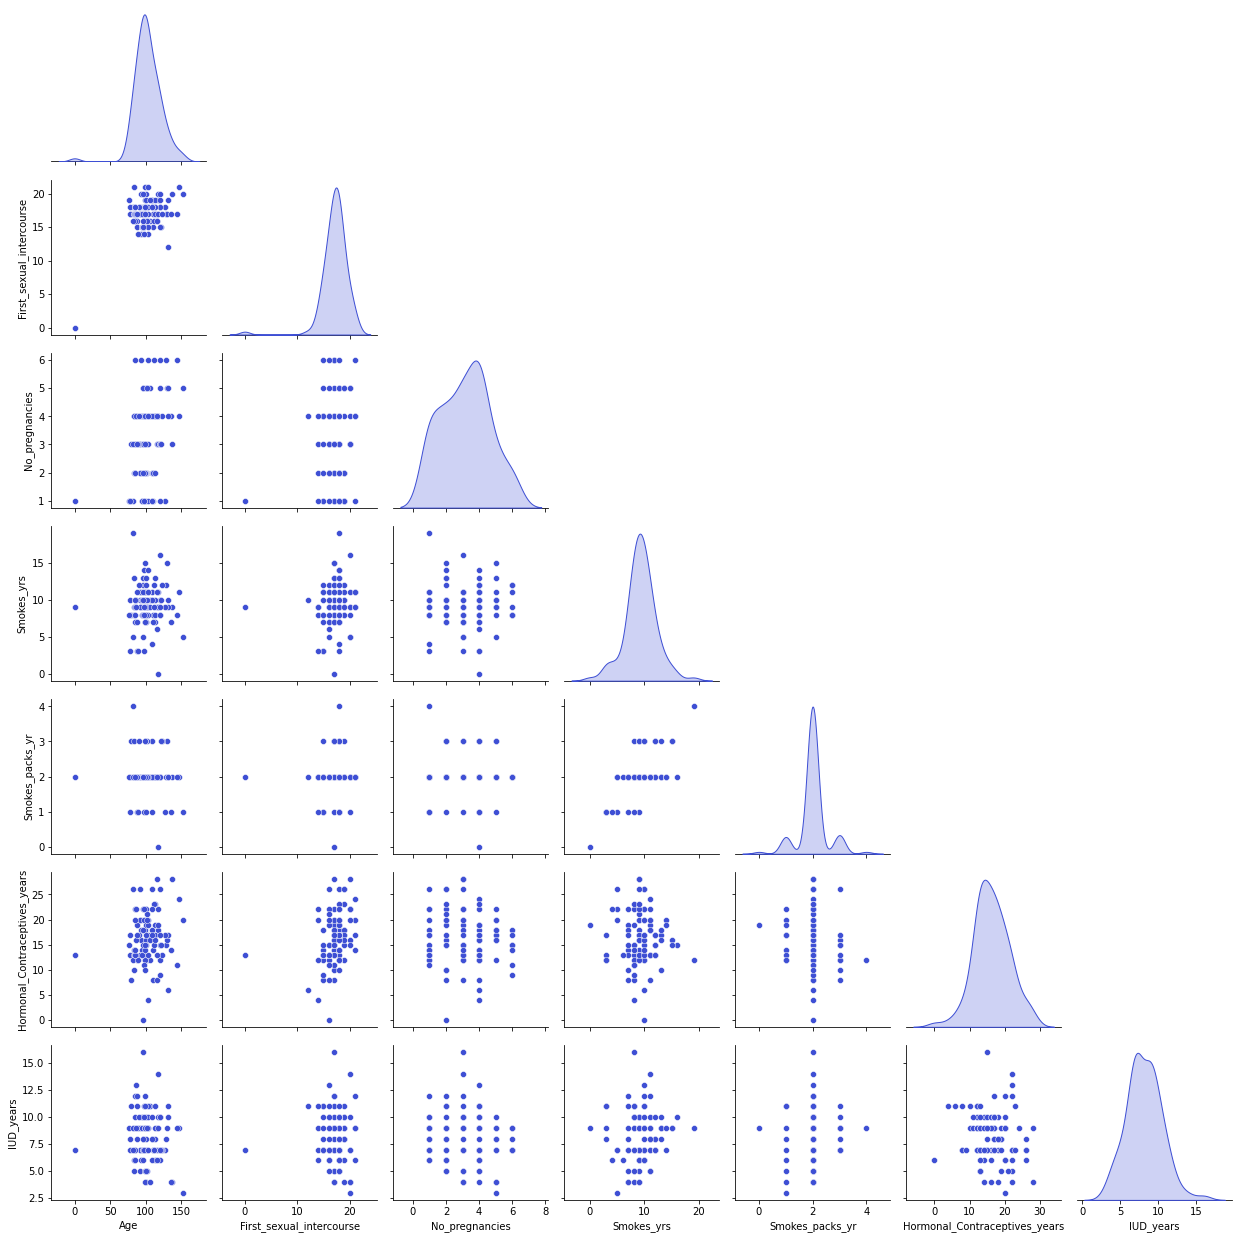

In [ ]:
sns.pairplot(df_synt[Gibbs_variables].sample(axis = 0, n = 100), corner=True, plot_kws=dict(color = "#3E4FD4"), diag_kws=dict(color = "#3E4FD4"), diag_kind = "kde")

# eventuellement si ca fait trop de donnees pour comparer au meme type de graph plus haut, .sample(axis = 0, n = 100)

We have 2 datsets:
- df_synt with synthetic data (Dx_Cancer = 1 only)
- df with observed data (98% of Dx_Cancer = 0 and 2% of DX_Cancer = 1)

For prediciton:
- learn on synthetic Dx_Cancer = 1 and predict on observed data only

## Multivariate Descriptive Statistics

Observed Data for Non-Cancer

In [ ]:
Gibbs_variables.append('Dx_Cancer')

df_obs=df[Gibbs_variables]
df_obs.describe()

,Age,First_sexual_intercourse,No_pregnancies,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives_years,IUD_years,Dx_Cancer
count,838.00,838.00,838.00,838.00,838.00,838.00,838.00,838.00
mean,26.81,17.00,2.27,1.22,0.42,2.36,0.45,0.02
std,8.53,2.81,1.45,4.09,1.86,3.81,1.82,0.14
min,13.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,15.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,25.00,17.00,2.00,0.00,0.00,0.58,0.00,0.00
75%,32.00,18.00,3.00,0.00,0.00,3.00,0.00,0.00
max,84.00,32.00,11.00,37.00,22.00,30.00,19.00,1.00


Synthetic Data for Cancer

In [ ]:
df_synt.describe()

,Age,Smokes_yrs,Smokes_packs_yr,No_pregnancies,Hormonal_Contraceptives_years,IUD_years,First_sexual_intercourse,Dx_Cancer
count,822.00,822.00,822.00,822.00,822.00,822.00,822.00,822.00
mean,103.43,9.94,2.08,3.01,16.54,8.19,17.56,1.00
std,14.38,3.04,0.55,1.32,5.03,2.28,1.82,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,93.50,8.00,2.00,2.00,13.00,7.00,17.00,1.00
50%,103.25,9.00,2.00,3.00,16.00,8.00,18.00,1.00
75%,113.25,12.00,2.00,4.00,20.00,10.00,19.00,1.00
max,153.25,26.00,5.00,7.00,35.00,16.00,24.00,1.00


## Exploratory Analysis


### For observed data only

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_obs.drop('Dx_Cancer', axis = 1), df_obs['Dx_Cancer'], test_size=.35)

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

pd.DataFrame(models)

100%|██████████| 29/29 [00:01<00:00, 23.52it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.81,0.58,0.58,0.87,0.02
LGBMClassifier,0.97,0.55,0.55,0.96,0.06
XGBClassifier,0.97,0.55,0.55,0.96,0.07
ExtraTreesClassifier,0.97,0.55,0.55,0.96,0.15
ExtraTreeClassifier,0.96,0.55,0.55,0.96,0.01
LabelPropagation,0.96,0.55,0.55,0.95,0.04
LabelSpreading,0.96,0.55,0.55,0.95,0.06
DecisionTreeClassifier,0.95,0.54,0.54,0.95,0.02
SVC,0.97,0.50,0.50,0.95,0.02


MODELS:
- NearestCentroid
- LinearDiscriminantAnalysis
- ExtraTreesClassifier
- DecisionTreeClassifier
- Perceptron
- SGDClassifier
- RidgeClassifier
- SVC

In [ ]:
# NearestCentroid does not have coef and feature importance (needed for rfe)

<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
2

Index(['Age', 'First_sexual_intercourse'], dtype='object')
F1Score: 0.1818181818181818


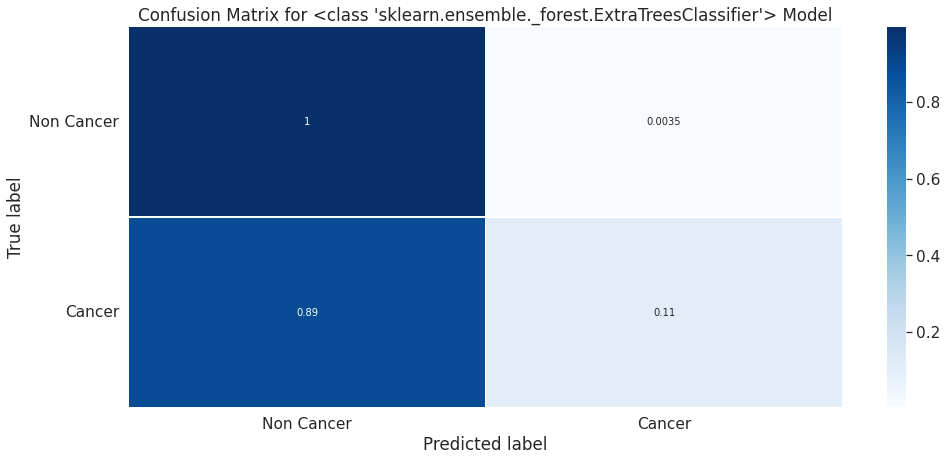

<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
4

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies',
       'Hormonal_Contraceptives_years'],
      dtype='object')
F1Score: 0.1818181818181818


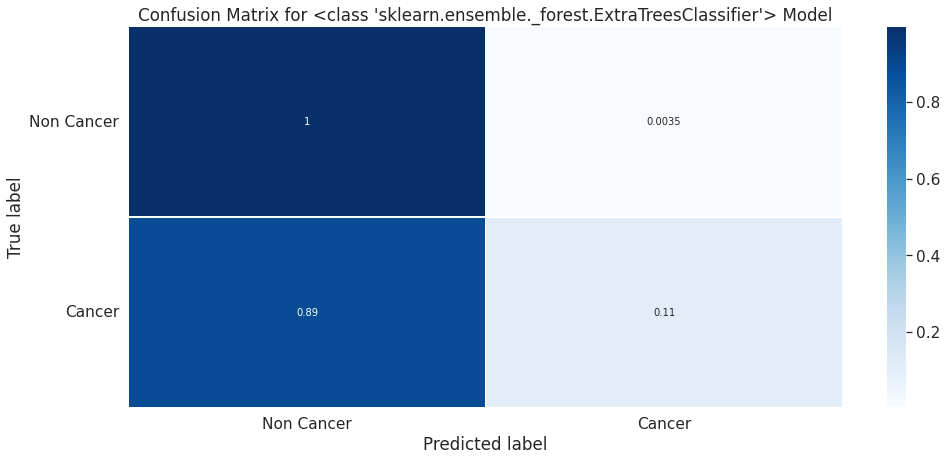

<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
5

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies',
       'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.1818181818181818


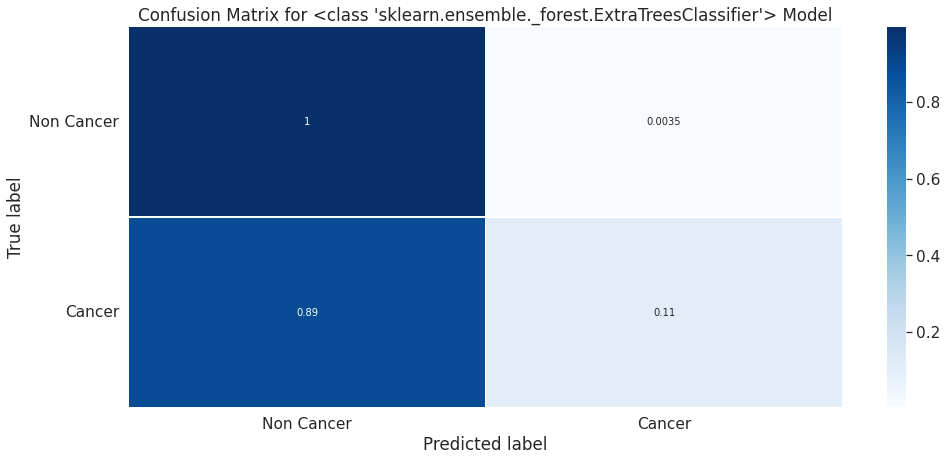

<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
6

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.1818181818181818


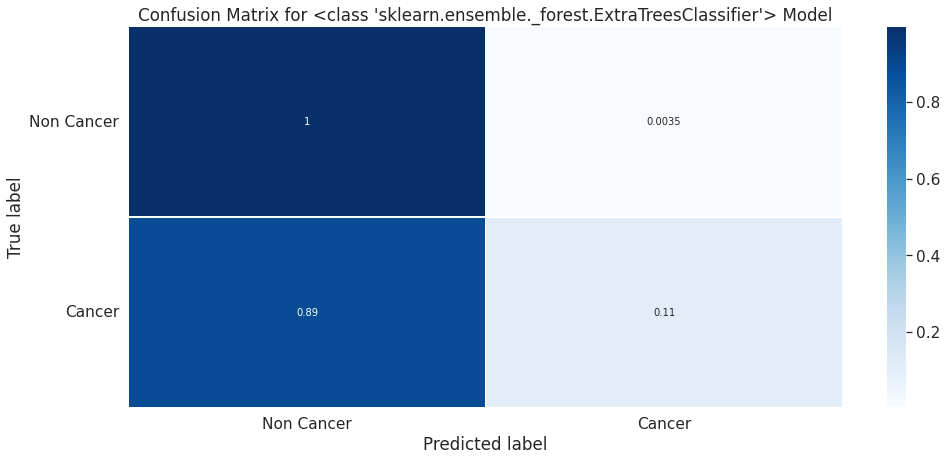

<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
7

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Smokes_packs_yr', 'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.1818181818181818


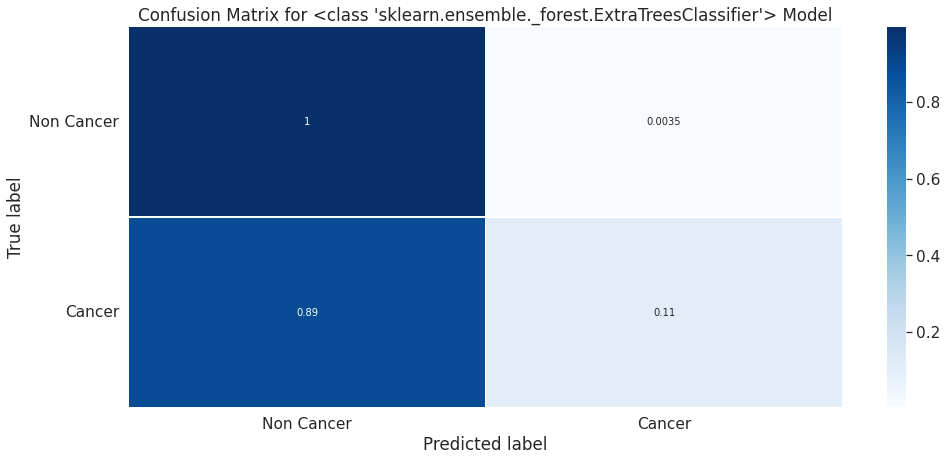

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
2

Index(['Age', 'First_sexual_intercourse'], dtype='object')
F1Score: 0.15384615384615383


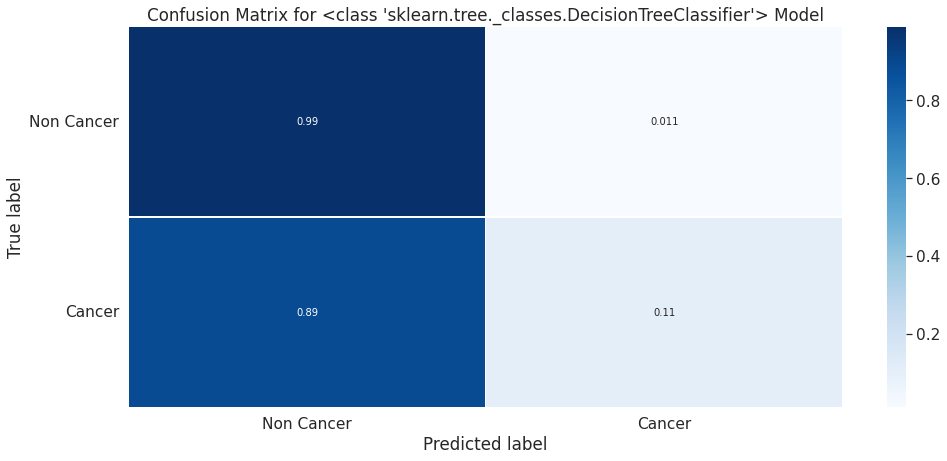

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
4

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs'], dtype='object')
F1Score: 0.11764705882352941


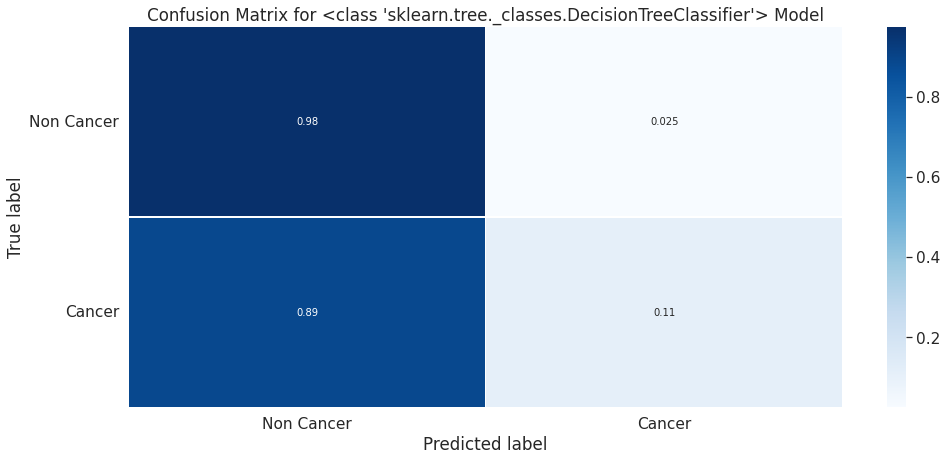

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
5

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Hormonal_Contraceptives_years'],
      dtype='object')
F1Score: 0.125


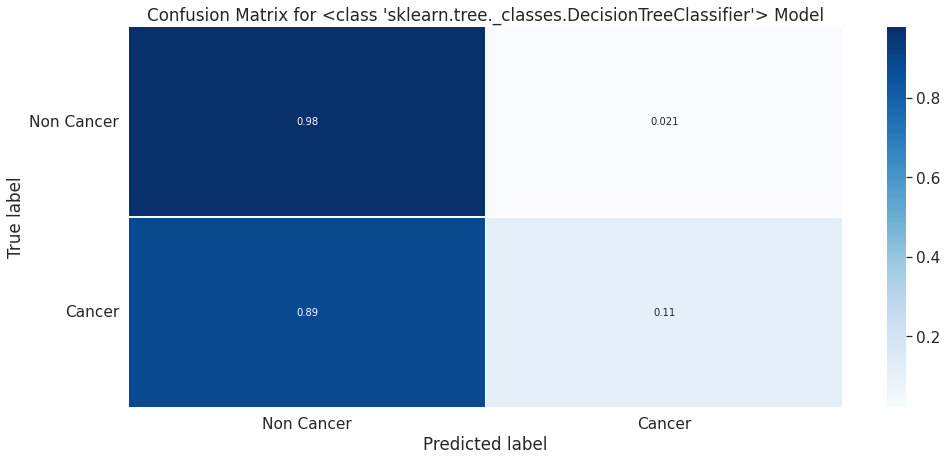

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
6

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.125


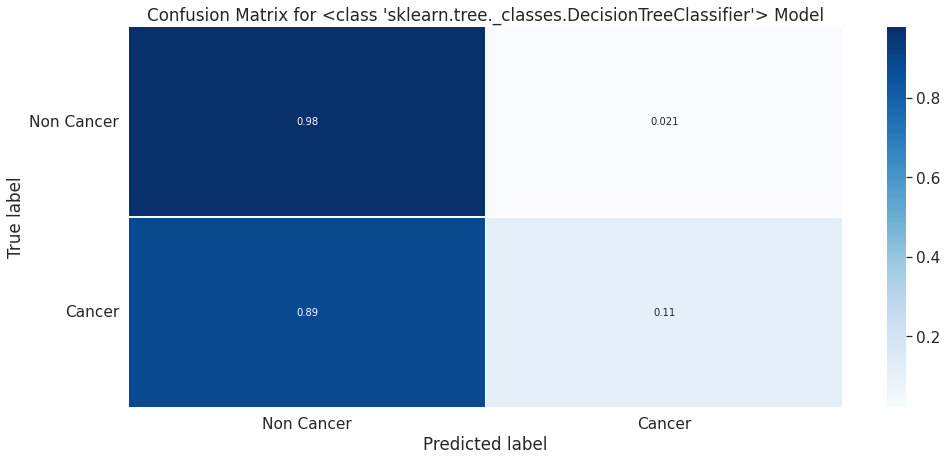

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
7

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Smokes_packs_yr', 'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.125


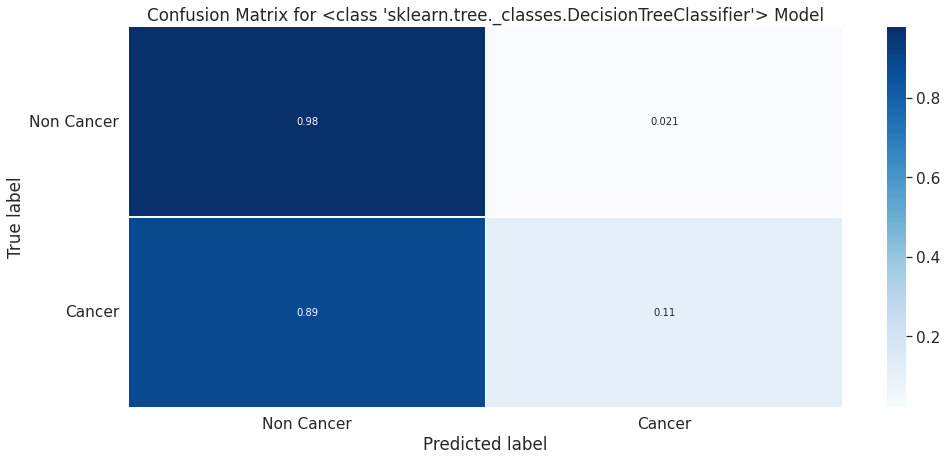

NearestCentroid()
all_features

F1Score: 0.125


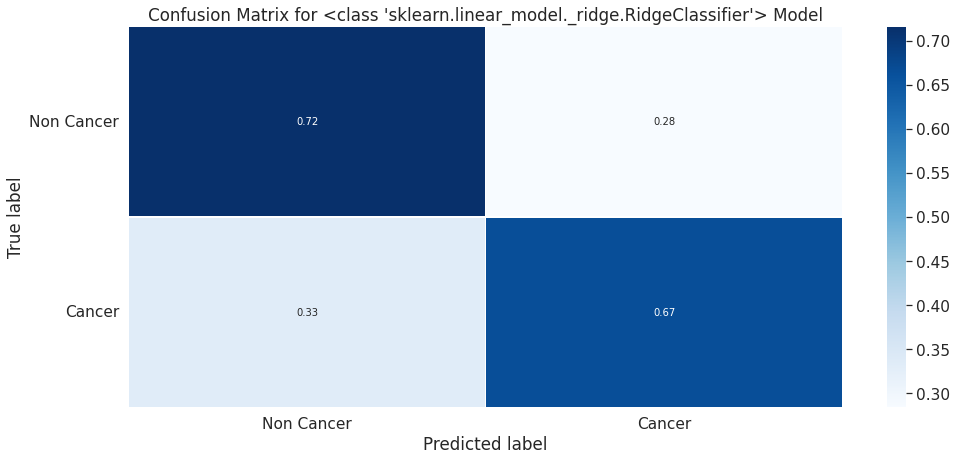

In [ ]:
models = [LinearDiscriminantAnalysis, ExtraTreesClassifier, DecisionTreeClassifier, Perceptron, SGDClassifier, RidgeClassifier]

for classifier in models:
    for nbr_features in range(2, 8):
        selector = RFE(classifier(), n_features_to_select=nbr_features)
        selector.fit(X_train, y_train)
        y_pred = selector.predict(X_test)
        f1_score = metrics.f1_score(y_test, y_pred)
        if f1_score > 0:
            print(f"{classifier}\n{nbr_features}\n")
            print(X_train.columns[selector.support_])
            print(f"F1Score: {f1_score}")

            # Get and reshape confusion matrix data
            matrix=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
            matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

            # Build the plot
            plt.figure(figsize=(16,7))
            sns.set(font_scale=1.4)
            sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                        cmap=plt.cm.Blues, linewidths=0.2)

            # Add labels to the plot
            class_names = ['Non Cancer', 'Cancer']
            tick_marks = np.arange(len(class_names)) + 0.5
            plt.xticks(tick_marks, class_names, rotation=0)
            plt.yticks(tick_marks, class_names, rotation=0)
            plt.xlabel('Predicted label')
            plt.ylabel('True label')
            plt.title(f'Confusion Matrix for {classifier} Model')
            plt.show()

selector = NearestCentroid()
selector.fit(X_train, y_train)
y_pred = selector.predict(X_test)
f1_score = metrics.f1_score(y_test, y_pred)
if f1_score > 0:
    print(f"NearestCentroid()\nall_features\n")
    print(f"F1Score: {f1_score}")

    # Get and reshape confusion matrix data
    matrix=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
    matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Blues, linewidths=0.2)

    # Add labels to the plot
    class_names = ['Non Cancer', 'Cancer']
    tick_marks = np.arange(len(class_names)) + 0.5
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {classifier} Model')
    plt.show()


selector = SVC()
selector.fit(X_train, y_train)
y_pred = selector.predict(X_test)
f1_score = metrics.f1_score(y_test, y_pred)
if f1_score > 0:
    print(f"SVC()\nall_features\n")
    print(f"F1Score: {f1_score}")

    # Get and reshape confusion matrix data
    matrix=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
    matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Blues, linewidths=0.2)

    # Add labels to the plot
    class_names = ['Non Cancer', 'Cancer']
    tick_marks = np.arange(len(class_names)) + 0.5
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {classifier} Model')
    plt.show()

### For both observed and synthetic data, 

learn on synthetic Dx_Cancer = 1 and observed Dx_Cancer = 0

and predict only observed Dx_Cancer = 1 and Dx_Cancer = 0

### Creation of Train / Test datasets

In [ ]:
# Creating a dataframe with 70% values of original dataframe
df_obs_Dx_Cancer_0 = df_obs[df_obs['Dx_Cancer'] == 0].sample(frac = 0.7)
 
# Creating dataframe with rest of the 30% values
rest_df_obs_Dx_Cancer_0 = df_obs[df_obs['Dx_Cancer'] == 0].drop(df_obs_Dx_Cancer_0.index)

train = pd.concat([df_obs_Dx_Cancer_0, df_synt], axis = 0)
test = pd.concat([rest_df_obs_Dx_Cancer_0, df_obs[df_obs['Dx_Cancer'] == 1]], axis = 0)

X_test = test.drop('Dx_Cancer', axis = 1)
y_test = test['Dx_Cancer']

X_train = train.drop('Dx_Cancer', axis = 1)
y_train = train['Dx_Cancer']

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

pd.DataFrame(models)

100%|██████████| 29/29 [00:01<00:00, 16.86it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.94,0.53,0.53,0.91,0.03
RidgeClassifierCV,0.94,0.53,0.53,0.91,0.03
RidgeClassifier,0.94,0.53,0.53,0.91,0.02
NearestCentroid,0.89,0.51,0.51,0.89,0.02
AdaBoostClassifier,0.94,0.50,0.50,0.90,0.14
XGBClassifier,0.94,0.50,0.50,0.90,0.10
SVC,0.94,0.50,0.50,0.90,0.03
SGDClassifier,0.94,0.50,0.50,0.90,0.03
RandomForestClassifier,0.94,0.50,0.50,0.90,0.19


MODELS:
- NearestCentroid
- LinearDiscriminantAnalysis
- ExtraTreesClassifier
- DecisionTreeClassifier
- Perceptron
- SGDClassifier
- RidgeClassifier
- SVC

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
2

Index(['Smokes_yrs', 'IUD_years'], dtype='object')
F1Score: 0.1935483870967742


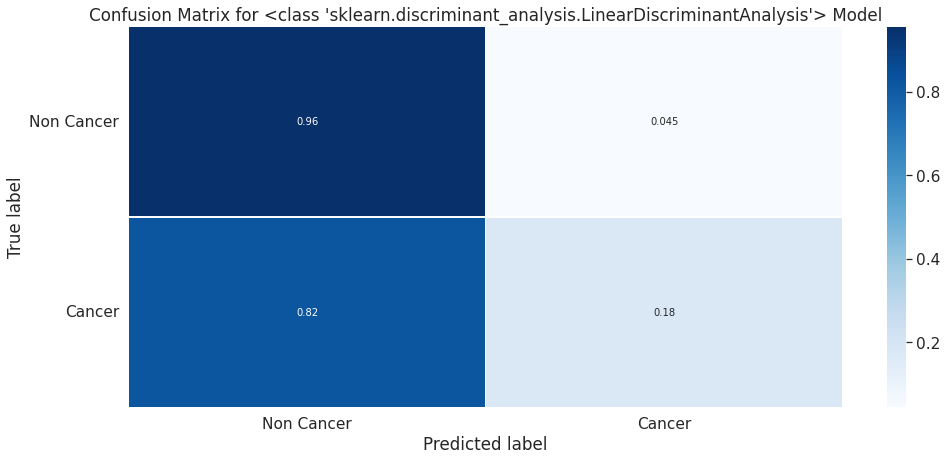

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
3

Index(['No_pregnancies', 'Smokes_yrs', 'IUD_years'], dtype='object')
F1Score: 0.20000000000000004


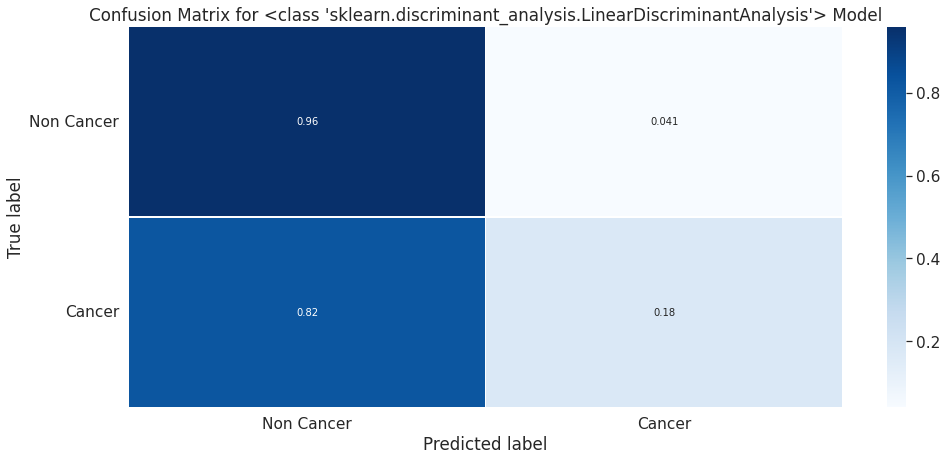

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
4

Index(['Age', 'No_pregnancies', 'Smokes_yrs', 'IUD_years'], dtype='object')
F1Score: 0.10526315789473684


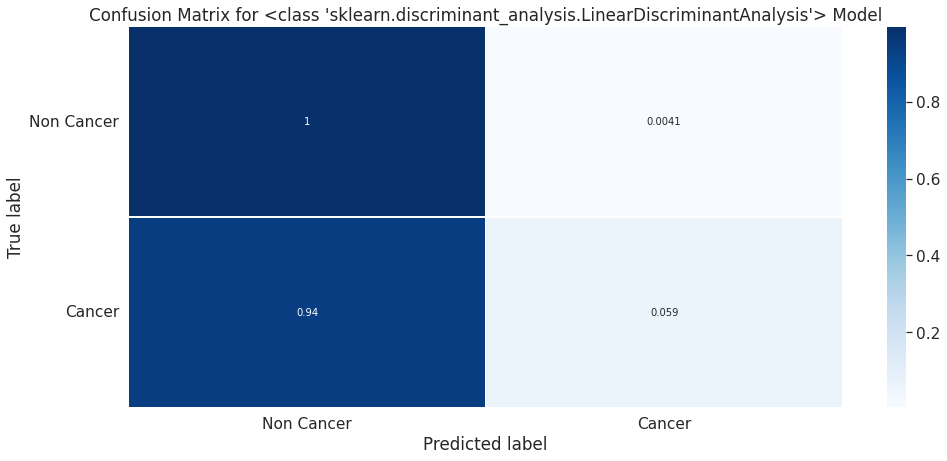

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
5

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'IUD_years'],
      dtype='object')
F1Score: 0.10526315789473684


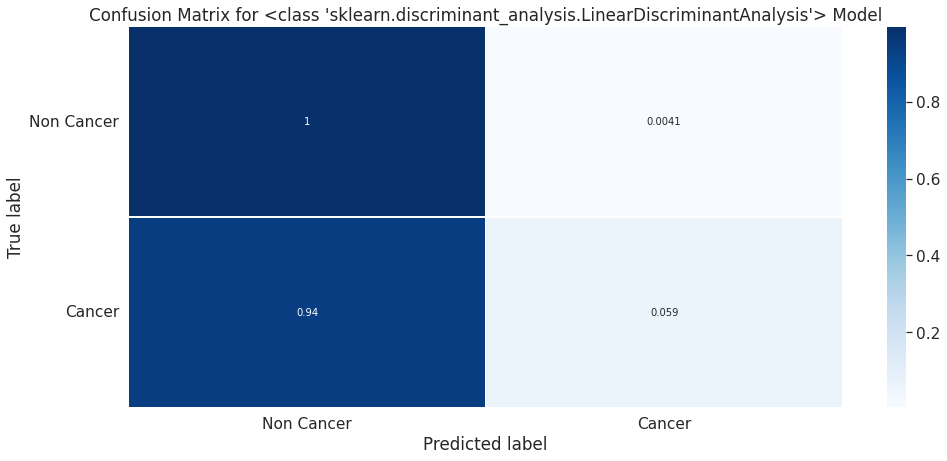

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
6

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.1111111111111111


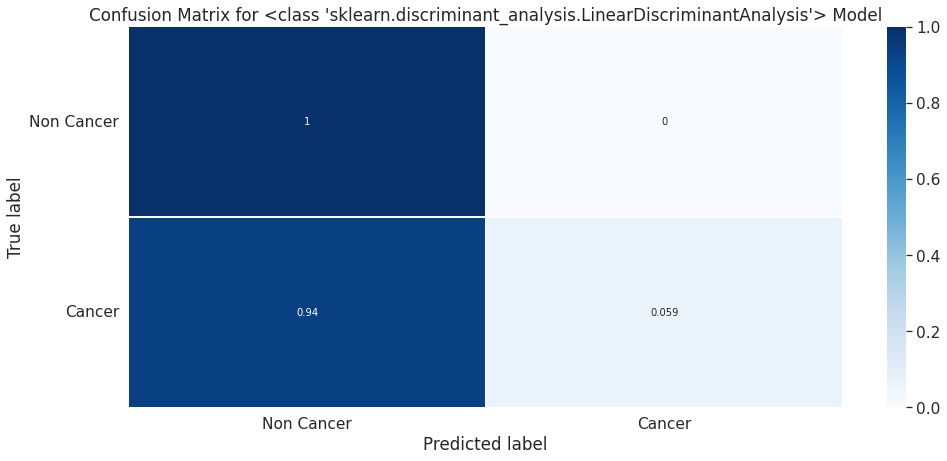

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
7

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Smokes_packs_yr', 'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.1111111111111111


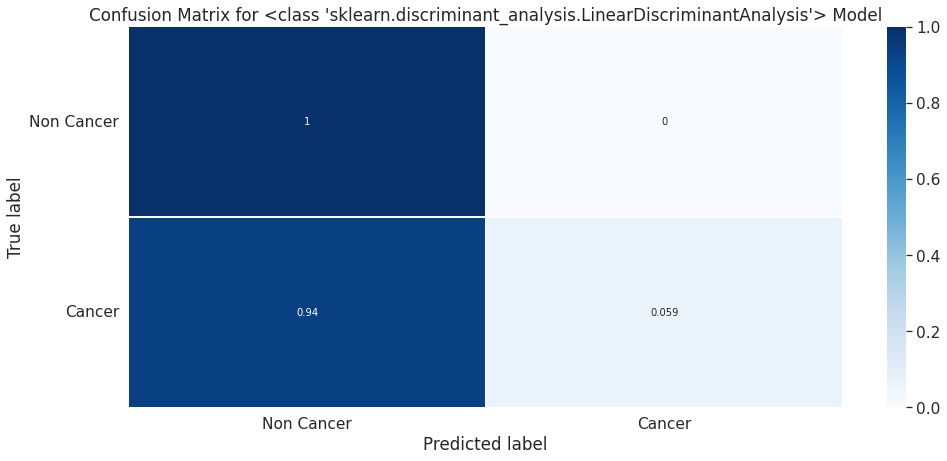

<class 'sklearn.linear_model._perceptron.Perceptron'>
2

Index(['First_sexual_intercourse', 'No_pregnancies'], dtype='object')
F1Score: 0.12142857142857143


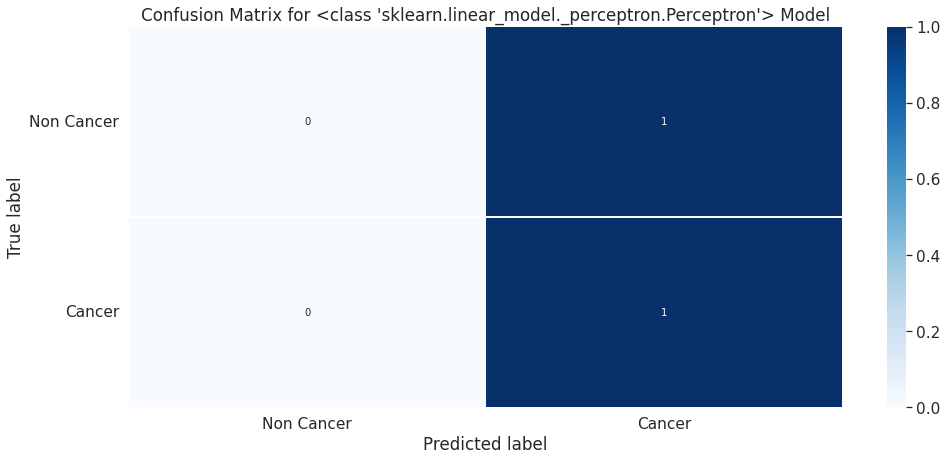

<class 'sklearn.linear_model._ridge.RidgeClassifier'>
2

Index(['Smokes_yrs', 'IUD_years'], dtype='object')
F1Score: 0.1935483870967742


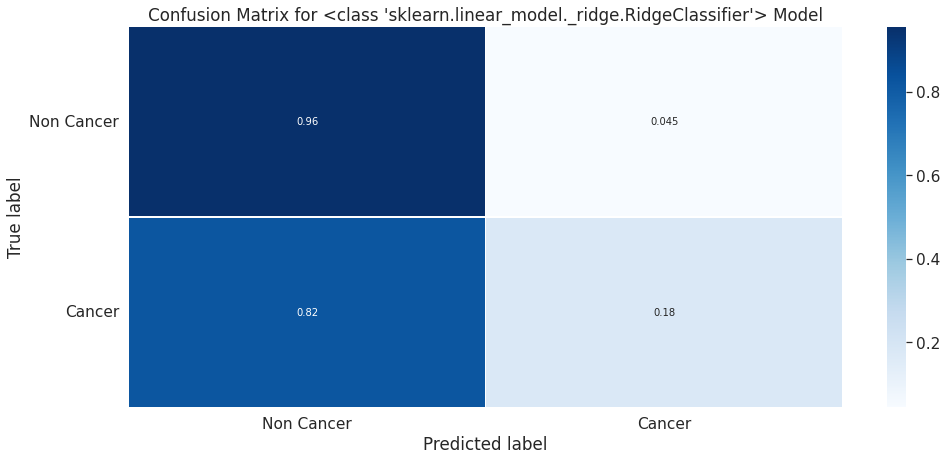

<class 'sklearn.linear_model._ridge.RidgeClassifier'>
3

Index(['No_pregnancies', 'Smokes_yrs', 'IUD_years'], dtype='object')
F1Score: 0.20000000000000004


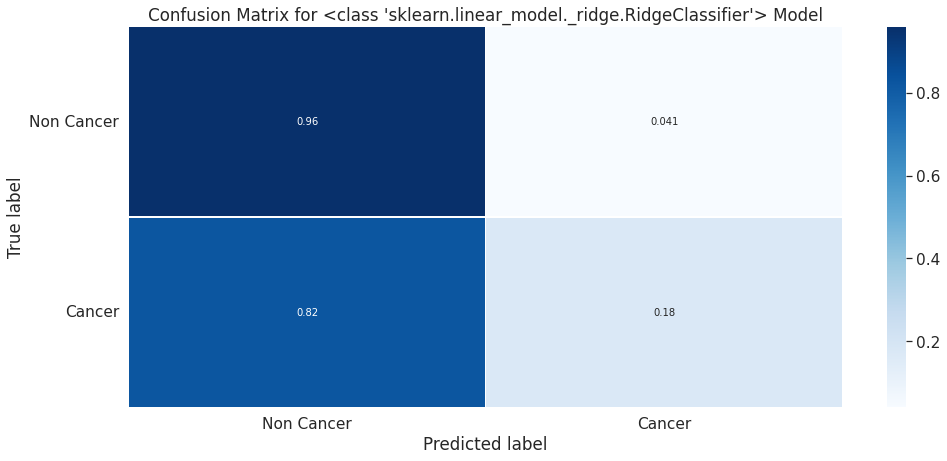

<class 'sklearn.linear_model._ridge.RidgeClassifier'>
4

Index(['Age', 'No_pregnancies', 'Smokes_yrs', 'IUD_years'], dtype='object')
F1Score: 0.10526315789473684


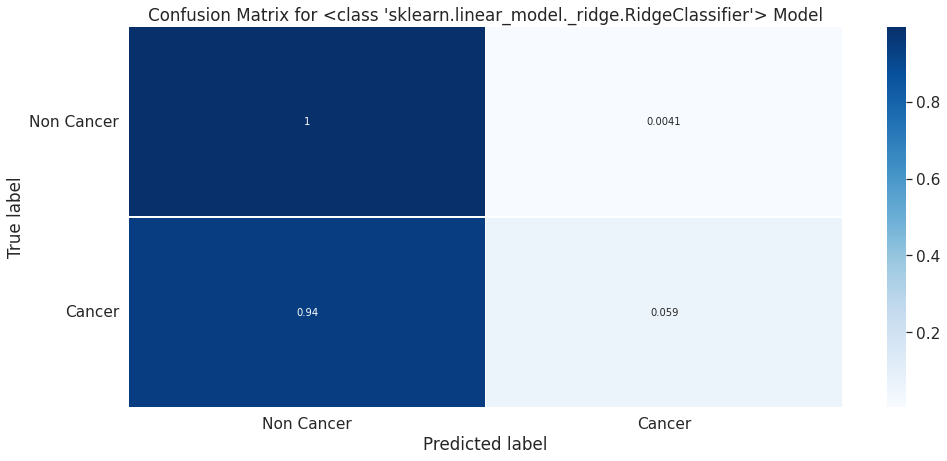

<class 'sklearn.linear_model._ridge.RidgeClassifier'>
5

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'IUD_years'],
      dtype='object')
F1Score: 0.10526315789473684


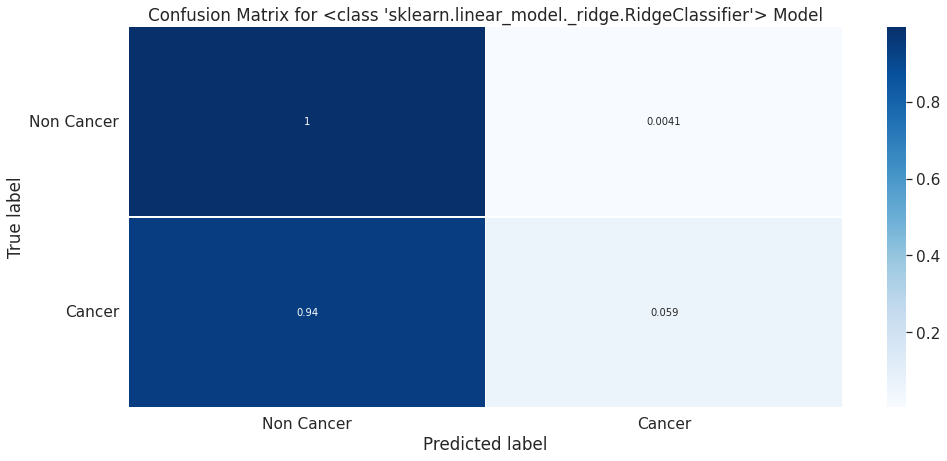

<class 'sklearn.linear_model._ridge.RidgeClassifier'>
6

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.1111111111111111


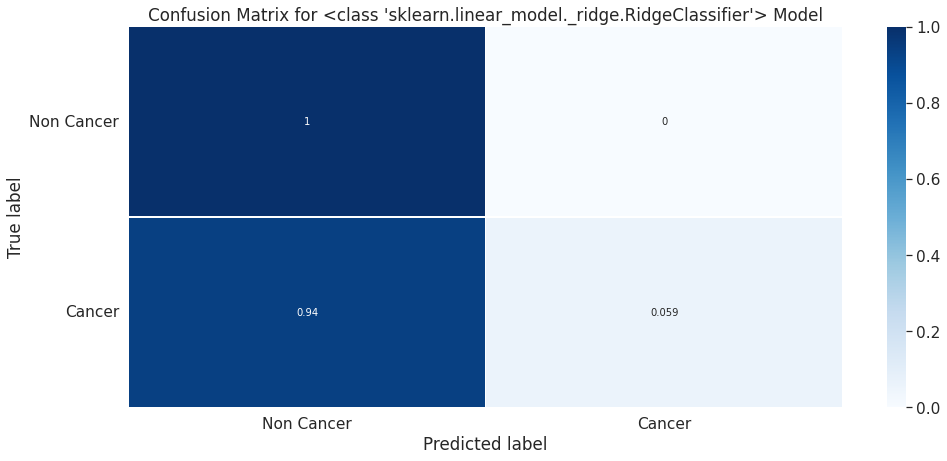

<class 'sklearn.linear_model._ridge.RidgeClassifier'>
7

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Smokes_packs_yr', 'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.1111111111111111


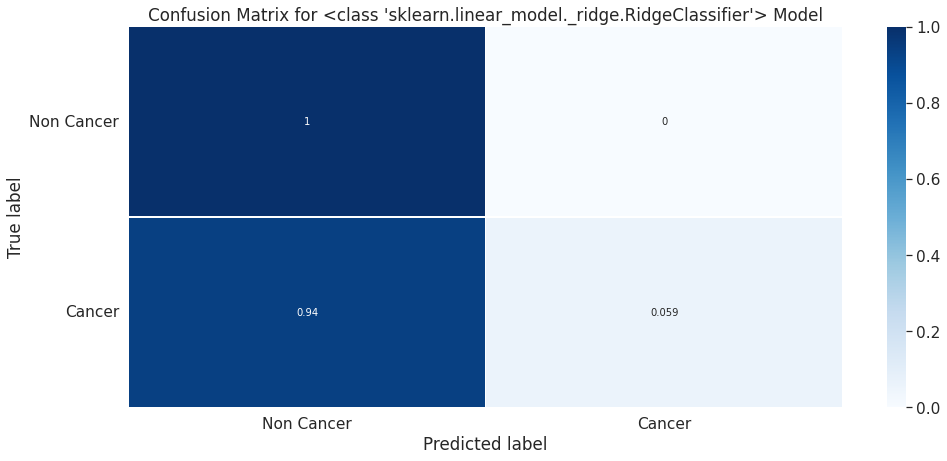

In [ ]:
models = [LinearDiscriminantAnalysis, ExtraTreesClassifier, DecisionTreeClassifier, Perceptron, SGDClassifier, RidgeClassifier]

for classifier in models:
    for nbr_features in range(2, 8):
        selector = RFE(classifier(), n_features_to_select=nbr_features)
        selector.fit(X_train, y_train)
        y_pred = selector.predict(X_test)
        f1_score = metrics.f1_score(y_test, y_pred)
        if f1_score > 0:
            print(f"{classifier}\n{nbr_features}\n")
            print(X_train.columns[selector.support_])
            print(f"F1Score: {f1_score}")

            # Get and reshape confusion matrix data
            matrix=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
            matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

            # Build the plot
            plt.figure(figsize=(16,7))
            sns.set(font_scale=1.4)
            sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                        cmap=plt.cm.Blues, linewidths=0.2)

            # Add labels to the plot
            class_names = ['Non Cancer', 'Cancer']
            tick_marks = np.arange(len(class_names)) + 0.5
            plt.xticks(tick_marks, class_names, rotation=0)
            plt.yticks(tick_marks, class_names, rotation=0)
            plt.xlabel('Predicted label')
            plt.ylabel('True label')
            plt.title(f'Confusion Matrix for {classifier} Model')
            plt.show()

selector = NearestCentroid()
selector.fit(X_train, y_train)
y_pred = selector.predict(X_test)
f1_score = metrics.f1_score(y_test, y_pred)
if f1_score > 0:
    print(f"NearestCentroid()\nall_features\n")
    print(f"F1Score: {f1_score}")

    # Get and reshape confusion matrix data
    matrix=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
    matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Blues, linewidths=0.2)

    # Add labels to the plot
    class_names = ['Non Cancer', 'Cancer']
    tick_marks = np.arange(len(class_names)) + 0.5
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {classifier} Model')
    plt.show()

selector = SVC()
selector.fit(X_train, y_train)
y_pred = selector.predict(X_test)
f1_score = metrics.f1_score(y_test, y_pred)
if f1_score > 0:
    print(f"SVC()\nall_features\n")
    print(f"F1Score: {f1_score}")

    # Get and reshape confusion matrix data
    matrix=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
    matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Blues, linewidths=0.2)

    # Add labels to the plot
    class_names = ['Non Cancer', 'Cancer']
    tick_marks = np.arange(len(class_names)) + 0.5
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {classifier} Model')
    plt.show()

## Stratified Binary Classification

### For Dummy Classifier

In [ ]:
strategies=['most_frequent', 'stratified', 'uniform', 'constant']
  
test_scores=[]
for s in strategies:
    if s=='constant':
        dclf=DummyClassifier(strategy=s, random_state=0, constant=0)
    else:
        dclf=DummyClassifier(strategy=s, random_state=0)

    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    f1_score = metrics.f1_score(y_test, y_pred)
    test_scores.append(f1_score)

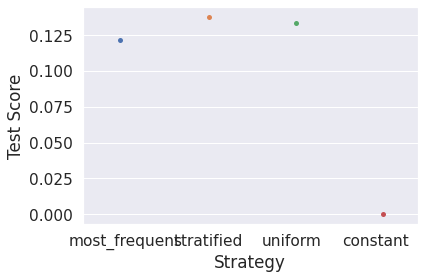

In [ ]:
ax=sns.stripplot(strategies, test_scores);
ax.set(xlabel ='Strategy', ylabel ='Test Score')
plt.show()

### For K neighbors Classifier

In [ ]:
clf=KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(f"F1Score: {metrics.f1_score(y_test, y_pred)}")

NameError: ignored

### For Random Forest Classifier

In [ ]:
clf=RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(f"F1Score: {metrics.f1_score(y_test, y_pred)}")

In [ ]:
df = pd.DataFrame(clf.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)
df.columns = ["absolute features importance"]

In [ ]:
preds=clf.predict(X_test)
metrics.confusion_matrix(y_test, preds,  labels=[0, 1])

print(f"F1Score: {metrics.f1_score(y_test, preds)}")

In [ ]:
# Get and reshape confusion matrix data
matrix=metrics.confusion_matrix(y_test, preds)
matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Non Cancer', 'Cancer']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
# View the classification report for test data and predictions
print(metrics.classification_report(y_test, preds))

In [ ]:
# Performance metrics
errors=abs(preds - y_test)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
baseline_mape=100 * (errors / y_test)

# Calculate and display accuracy
baseline_accuracy=100 - np.mean(baseline_mape)
print('Accuracy:', round(baseline_accuracy, 2), '%.')

## Optimized Stratified Binary Classification

- why standardisation ?

In [ ]:
# We first standardize the data
X_train_stand=(X_train - np.mean(X_train))/np.std(X_train)
X_test_stand=(X_test - np.mean(X_test))/np.std(X_test)

Y_train_stand=(y_train - np.mean(y_train))/np.std(y_train)
Y_test_stand=(y_test - np.mean(y_test))/np.std(y_test)

# We now fit a new Random Forest to the standardized dataset
rf_exp=RandomForestRegressor(n_estimators=1000, random_state=100)
rf_exp.fit(X_train_stand, Y_train_stand)

# We compute the predictions on the standardized test data
preds_stand=rf_exp.predict(X_test_stand)

In [ ]:
# Performance metrics
errors_stand=abs(preds_stand - Y_test_stand)
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors_stand), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape=np.mean(100 * (errors_stand / Y_test_stand))

# Compare to baseline
improvement_baseline=100 * abs(mape - baseline_mape) / baseline_mape
print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculate and display accuracy
accuracy=100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

###### Hyper-Parameter Tuning

Optimization of the accuracy metric

In [ ]:
# parameter grid
pgrid={    
    'max_depth' : [51,None],
    'n_estimators': [451,751,1000,1100],    
    'max_features' : ['sqrt','log2'],
    'min_samples_split' : [5,6],
    'min_samples_leaf' : [1,2,3],
    'criterion' : ['gini','entropy']    
}

# specifying the cv
cv_skf=StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# specifying the model 
rfgs=RandomForestClassifier(n_jobs=-1, verbose=1)


# specify the grid search cv
cv=RandomizedSearchCV(estimator=rfgs,param_distributions=pgrid,cv=cv_skf,n_jobs=-1, 
                        verbose=10, scoring='accuracy',random_state=0)

rf_search=cv.fit(X_train_stand, Y_train_stand)
rf_search.best_params_

Optimization of the balanced accuracy metric

In [ ]:
# parameter grid
pgrid={    
    'n_estimators': [451,751,1000,1100],
    'max_depth' : [51,None],    
    'min_samples_split' : [3,5],
    'min_samples_leaf' : [1,2],
    'criterion' : ['gini','entropy']  
}

# specifying the cv
cv_skf=StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# specifying the model 
rfgs=RandomForestClassifier(n_jobs=-1, verbose=1)

# specify the grid search cv
cv=RandomizedSearchCV(estimator=rfgs,param_distributions=pgrid,cv=cv_skf,n_jobs=-1,verbose=10,
                        scoring='balanced_accuracy',random_state=0)

rf_search=cv.fit(X_train_stand, Y_train_stand)
rf_search.best_params_

In [ ]:
clf_opti=RandomForestClassifier(criterion='gini',
                                max_depth=None,
                                max_features='log2',
                                min_samples_leaf=1,
                                min_samples_split=5,
                                n_estimators=1000)

clf_opti.fit(X_train_stand, Y_train_stand)
pd.DataFrame(clf_opti.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

In [ ]:
clf_opti.decision_path(X_train)

## Spectral transformation for Causal inference

### On observed data:

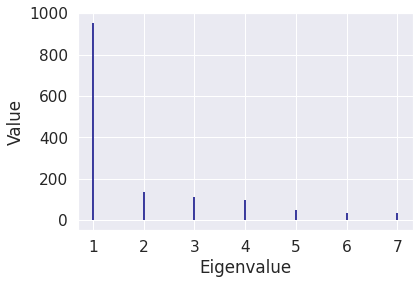

In [ ]:
# compute SVD decomposition on "X" data (without claffisication variable)
U, D, V = np.linalg.svd(df_obs.drop('Dx_Cancer', axis = 1).values, full_matrices=False)

# plot eigenvalues
plt.xlabel('Eigenvalue')
plt.ylabel('Value')
plt.vlines(range(1, len(D)+1), np.zeros(len(D)), np.sort(D)[::-1], colors="navy")
plt.show();

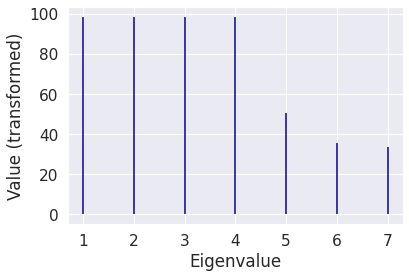

In [ ]:
# compute spectral transformation
D_median = np.median(D)
F = np.linalg.multi_dot([U, np.diag([np.min([D_median, x]) / x for x in D]), U.T])

# compute transformed design matrix
TX = np.dot(F, df_obs.drop('Dx_Cancer', axis = 1).values)

# compute transformed eigenvalues
TD = np.linalg.svd(TX, full_matrices=False, compute_uv=False)

# plot transformed eigenvalues
plt.xlabel('Eigenvalue')
plt.ylabel('Value (transformed)')
plt.vlines(range(1, len(TD)+1), np.zeros(len(TD)), np.sort(TD)[::-1], colors="navy")
plt.show()

In [ ]:
df_obs_predictors_transformed = pd.DataFrame(TX, index=df_obs.drop('Dx_Cancer', axis = 1).index, columns=df_obs.drop('Dx_Cancer', axis = 1).columns)

X_train, X_test, y_train, y_test = train_test_split(df_obs_predictors_transformed, df_obs['Dx_Cancer'], test_size=0.3)

# transformed design matrices:
X_train_sp = X_train.values
X_test_sp = X_test.values

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_sp, X_test_sp, y_train, y_test)

pd.DataFrame(models)

100%|██████████| 29/29 [00:03<00:00,  8.56it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.98,0.50,0.50,0.97,0.06
KNeighborsClassifier,0.98,0.50,0.50,0.97,0.04
SVC,0.98,0.50,0.50,0.97,0.04
RidgeClassifierCV,0.98,0.50,0.50,0.97,0.03
RidgeClassifier,0.98,0.50,0.50,0.97,0.03
RandomForestClassifier,0.98,0.50,0.50,0.97,0.51
Perceptron,0.98,0.50,0.50,0.97,0.08
LogisticRegression,0.98,0.50,0.50,0.97,0.06
LGBMClassifier,0.98,0.50,0.50,0.97,0.32


MODELS:
- NearestCentroid
- LinearDiscriminantAnalysis
- ExtraTreesClassifier
- DecisionTreeClassifier
- Perceptron
- SGDClassifier
- RidgeClassifier
- SVC

In [ ]:
clf = ExtraTreesClassifier().fit(X_train_sp, y_train)
y_pred = clf.predict(X_test_sp)
f1_score = metrics.f1_score(y_test, y_pred)
print(f1_score)
clf.feature_importances_

0.3333333333333333


array([0.15474061, 0.13446141, 0.14296383, 0.12294779, 0.11947868,
       0.15704475, 0.16836292])

<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
3

Index(['No_pregnancies', 'Hormonal_Contraceptives_years', 'IUD_years'], dtype='object')
F1Score: 0.2


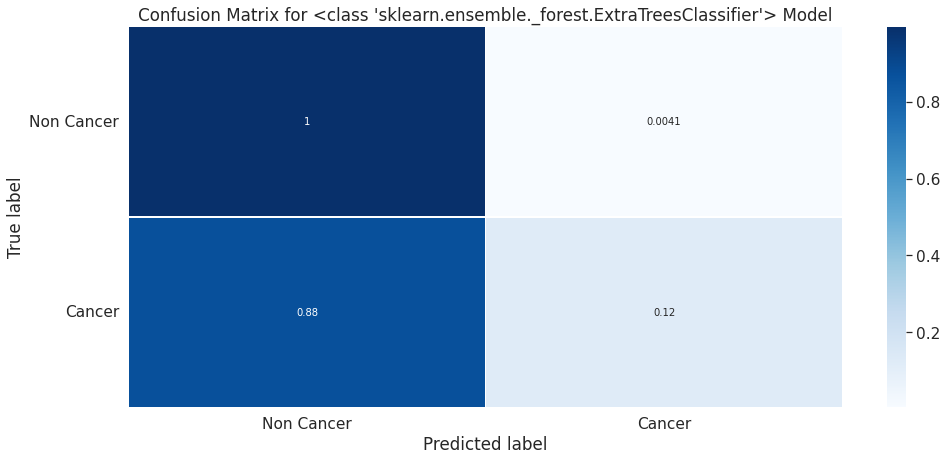

<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
4

Index(['First_sexual_intercourse', 'No_pregnancies',
       'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.2222222222222222


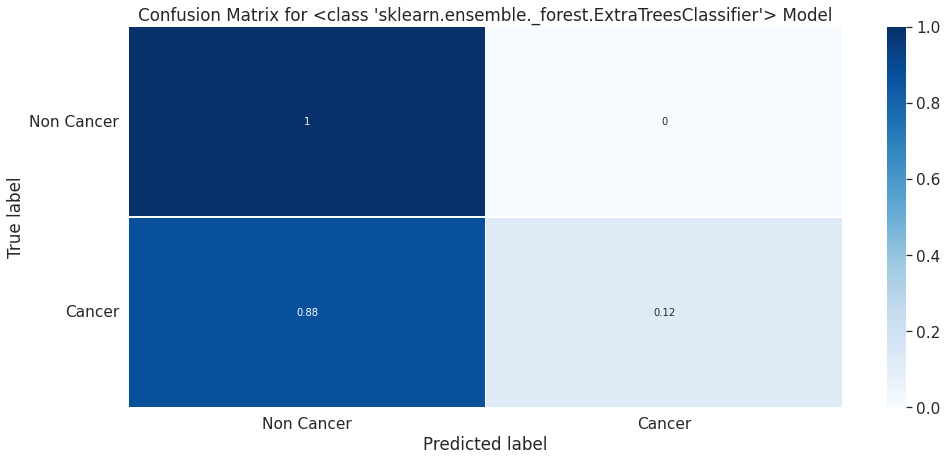

<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
5

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies',
       'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.2222222222222222


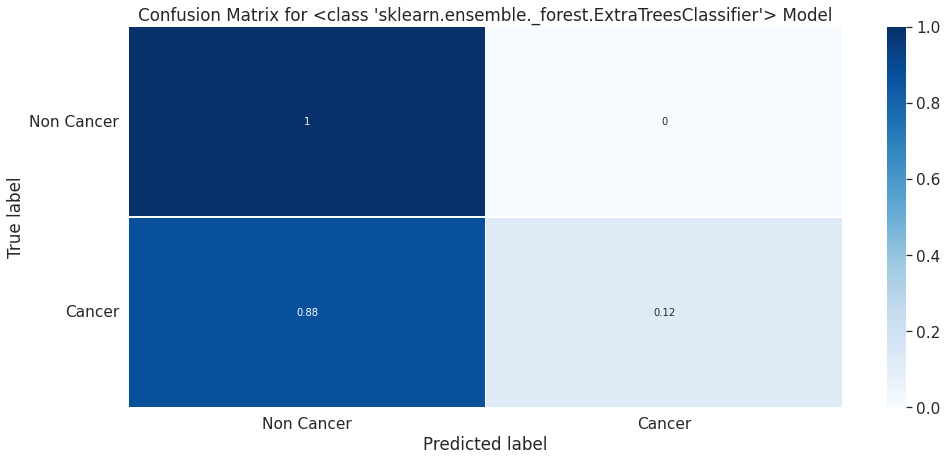

<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
6

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.2


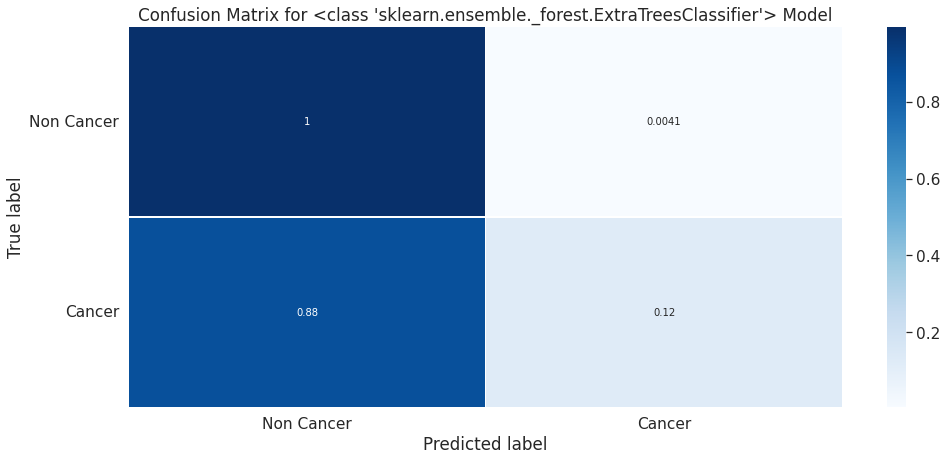

<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
7

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Smokes_packs_yr', 'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.2


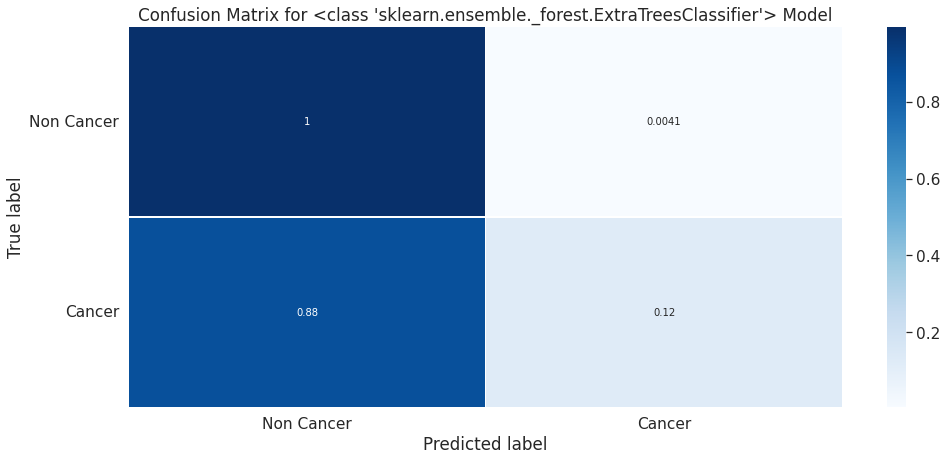

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
2

Index(['No_pregnancies', 'Hormonal_Contraceptives_years'], dtype='object')
F1Score: 0.15384615384615385


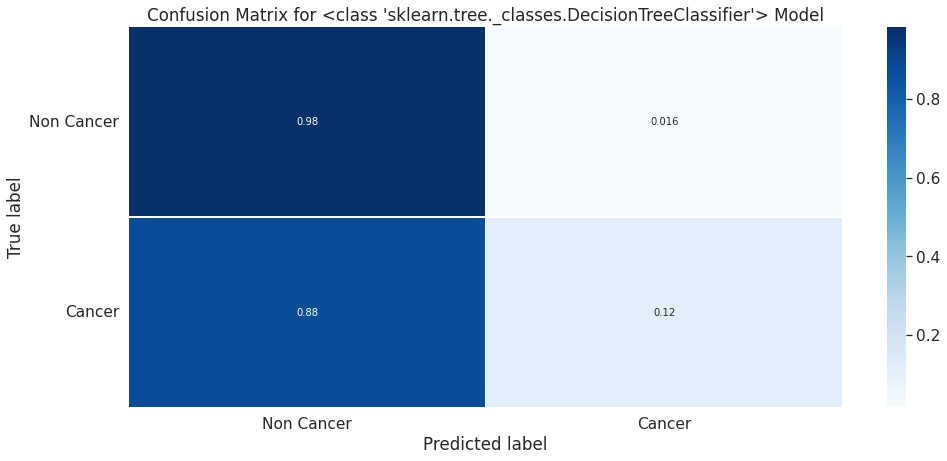

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
3

Index(['Age', 'Hormonal_Contraceptives_years', 'IUD_years'], dtype='object')
F1Score: 0.16666666666666666


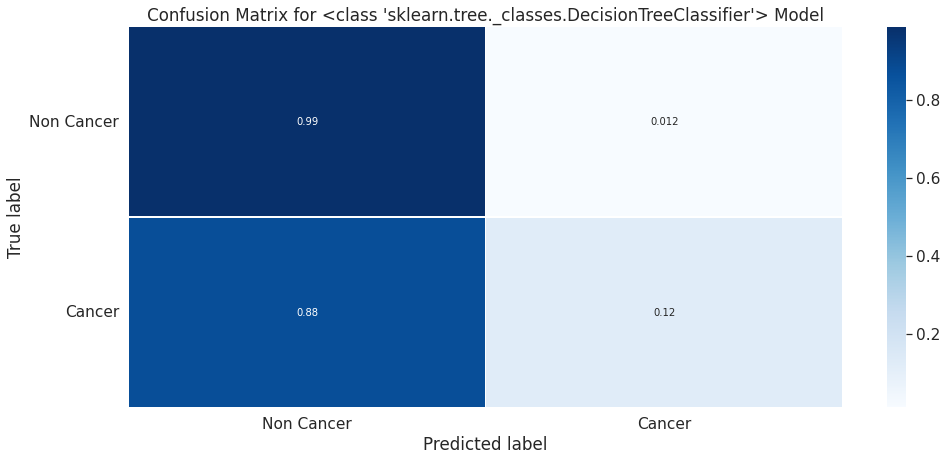

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
4

Index(['Age', 'No_pregnancies', 'Hormonal_Contraceptives_years', 'IUD_years'], dtype='object')
F1Score: 0.14285714285714288


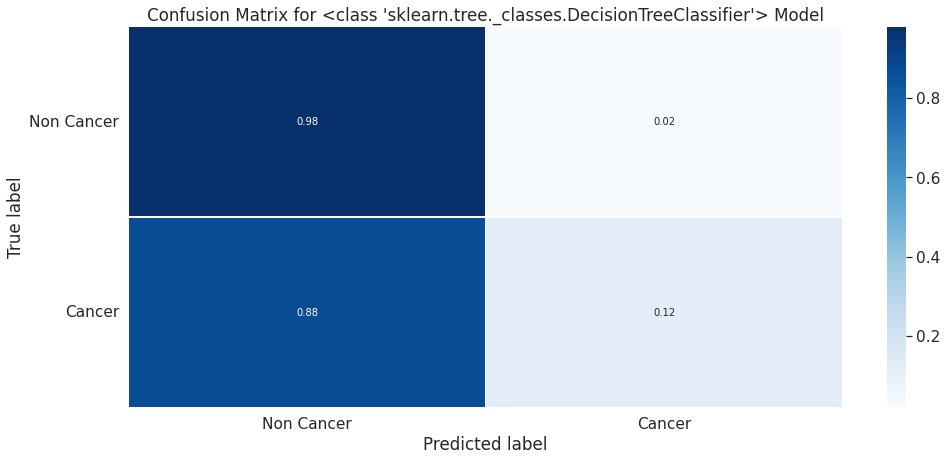

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
5

Index(['Age', 'No_pregnancies', 'Smokes_yrs', 'Hormonal_Contraceptives_years',
       'IUD_years'],
      dtype='object')
F1Score: 0.125


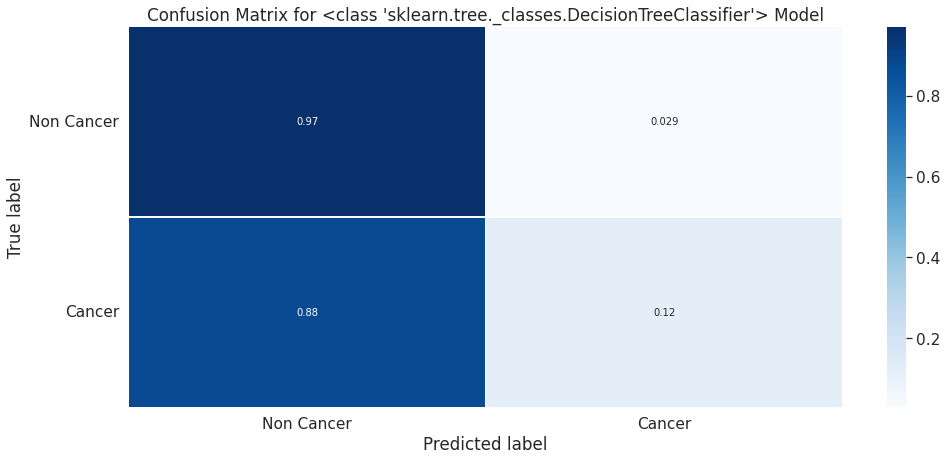

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
6

Index(['Age', 'No_pregnancies', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.15384615384615385


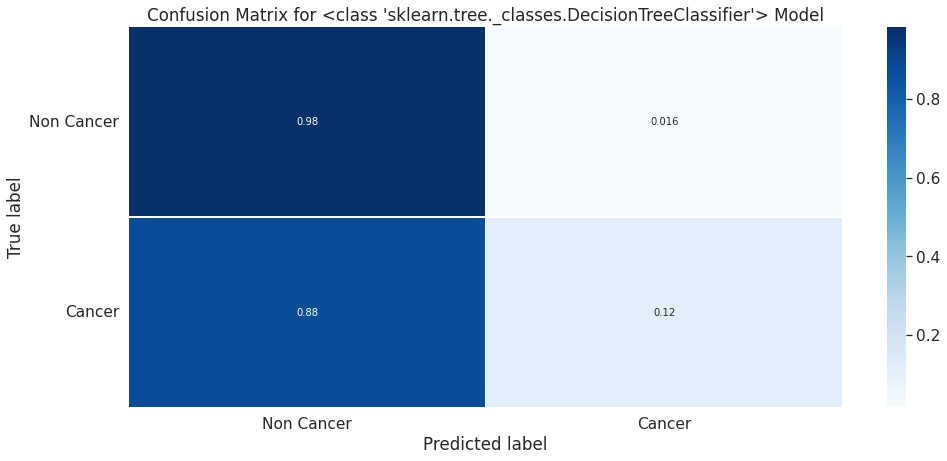

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
7

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Smokes_packs_yr', 'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.15384615384615385


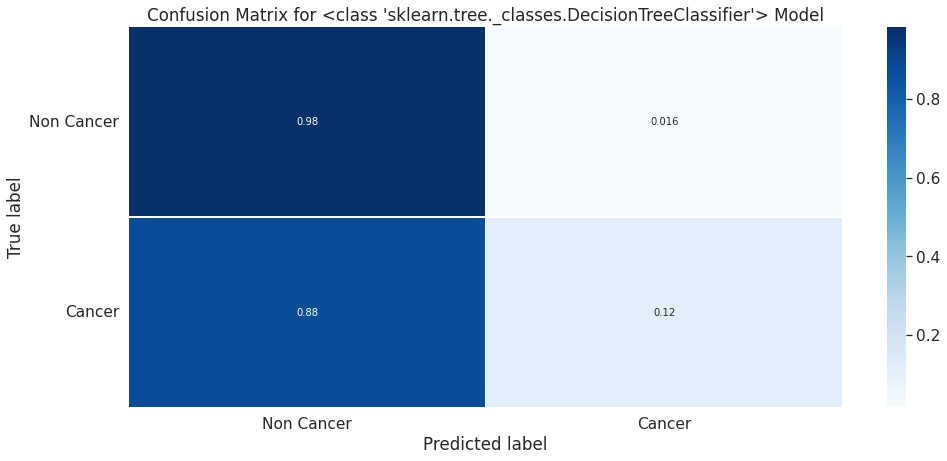

<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
6

Index(['Age', 'No_pregnancies', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.2


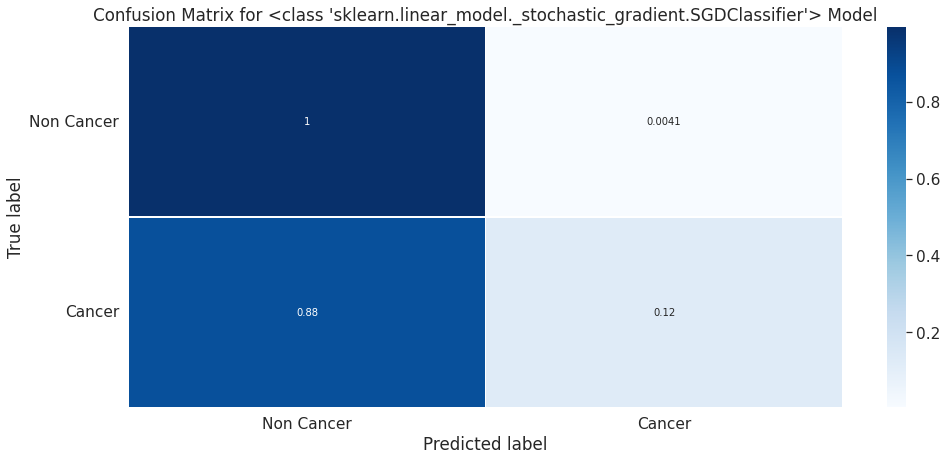

NearestCentroid()
all_features

F1Score: 0.07792207792207792


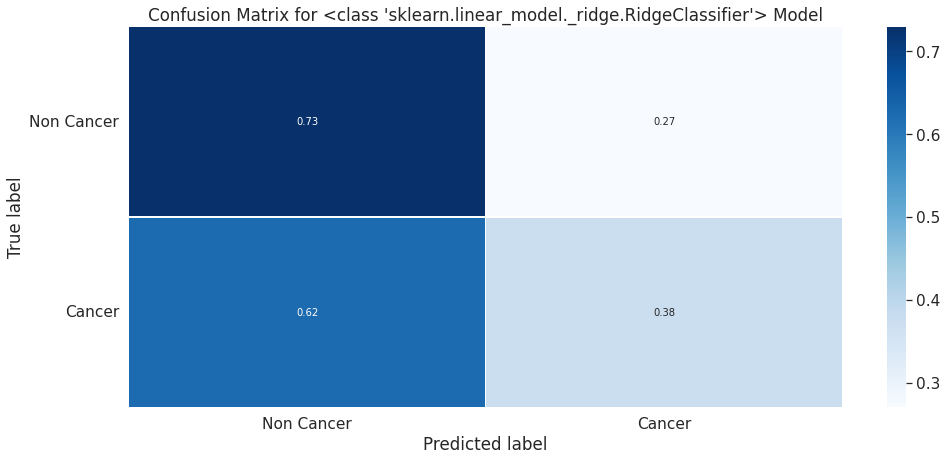

In [ ]:
models = [LinearDiscriminantAnalysis, ExtraTreesClassifier, DecisionTreeClassifier, Perceptron, SGDClassifier, RidgeClassifier]

for classifier in models:
    for nbr_features in range(2, 8):
        selector = RFE(classifier(), n_features_to_select=nbr_features)
        selector.fit(X_train_sp, y_train)
        y_pred = selector.predict(X_test_sp)
        f1_score = metrics.f1_score(y_test, y_pred)
        if f1_score > 0:
            print(f"{classifier}\n{nbr_features}\n")
            print(X_train.columns[selector.support_])
            print(f"F1Score: {f1_score}")

            # Get and reshape confusion matrix data
            matrix=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
            matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

            # Build the plot
            plt.figure(figsize=(16,7))
            sns.set(font_scale=1.4)
            sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                        cmap=plt.cm.Blues, linewidths=0.2)

            # Add labels to the plot
            class_names = ['Non Cancer', 'Cancer']
            tick_marks = np.arange(len(class_names)) + 0.5
            plt.xticks(tick_marks, class_names, rotation=0)
            plt.yticks(tick_marks, class_names, rotation=0)
            plt.xlabel('Predicted label')
            plt.ylabel('True label')
            plt.title(f'Confusion Matrix for {classifier} Model')
            plt.show()

selector = NearestCentroid()
selector.fit(X_train_sp, y_train)
y_pred = selector.predict(X_test_sp)
f1_score = metrics.f1_score(y_test, y_pred)
if f1_score > 0:
    print(f"NearestCentroid()\nall_features\n")
    print(f"F1Score: {f1_score}")

    # Get and reshape confusion matrix data
    matrix=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
    matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Blues, linewidths=0.2)

    # Add labels to the plot
    class_names = ['Non Cancer', 'Cancer']
    tick_marks = np.arange(len(class_names)) + 0.5
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {classifier} Model')
    plt.show()

selector = SVC()
selector.fit(X_train_sp, y_train)
y_pred = selector.predict(X_test_sp)
f1_score = metrics.f1_score(y_test, y_pred)
if f1_score > 0:
    print(f"SVC()\nall_features\n")
    print(f"F1Score: {f1_score}")

    # Get and reshape confusion matrix data
    matrix=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
    matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Blues, linewidths=0.2)

    # Add labels to the plot
    class_names = ['Non Cancer', 'Cancer']
    tick_marks = np.arange(len(class_names)) + 0.5
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {classifier} Model')
    plt.show()

### On observed + synthetic data:

In [ ]:
# Creating a dataframe with 70% values of original dataframe
df_obs_Dx_Cancer_0 = df_obs[df_obs['Dx_Cancer'] == 0].sample(frac = 0.7)
 
# Creating dataframe with rest of the 30% values
rest_df_obs_Dx_Cancer_0 = df_obs[df_obs['Dx_Cancer'] == 0].drop(df_obs_Dx_Cancer_0.index)

train = pd.concat([df_obs_Dx_Cancer_0, df_synt], axis = 0)
test = pd.concat([rest_df_obs_Dx_Cancer_0, df_obs[df_obs['Dx_Cancer'] == 1]], axis = 0)

X_test = test.drop('Dx_Cancer', axis = 1)
y_test = test['Dx_Cancer']

X_train = train.drop('Dx_Cancer', axis = 1)
y_train = train['Dx_Cancer']

X_data = pd.concat([X_train, X_test], axis=0)

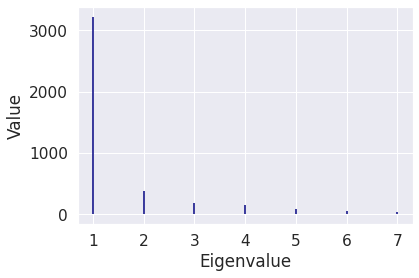

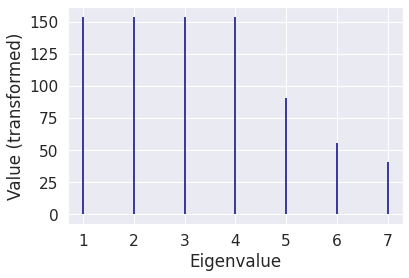

100%|██████████| 29/29 [00:02<00:00, 10.36it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.84,0.56,0.56,0.86,0.11
RidgeClassifierCV,0.94,0.53,0.53,0.91,0.06
RidgeClassifier,0.94,0.53,0.53,0.91,0.03
Perceptron,0.94,0.53,0.53,0.91,0.02
LinearDiscriminantAnalysis,0.94,0.53,0.53,0.91,0.04
PassiveAggressiveClassifier,0.92,0.52,0.52,0.90,0.02
AdaBoostClassifier,0.94,0.50,0.50,0.90,0.19
XGBClassifier,0.94,0.50,0.50,0.90,0.08
SVC,0.94,0.50,0.50,0.90,0.07


In [ ]:
# compute SVD decomposition on "X" data (without claffisication variable)
U, D, V = np.linalg.svd(X_data.values, full_matrices=False)

# plot eigenvalues
plt.xlabel('Eigenvalue')
plt.ylabel('Value')
plt.vlines(range(1, len(D)+1), np.zeros(len(D)), np.sort(D)[::-1], colors="navy")
plt.show();

# compute spectral transformation
D_median = np.median(D)
F = np.linalg.multi_dot([U, np.diag([np.min([D_median, x]) / x for x in D]), U.T])

# compute transformed design matrix
TX = np.dot(F, X_data.values)

# compute transformed eigenvalues
TD = np.linalg.svd(TX, full_matrices=False, compute_uv=False)

# plot transformed eigenvalues
plt.xlabel('Eigenvalue')
plt.ylabel('Value (transformed)')
plt.vlines(range(1, len(TD)+1), np.zeros(len(TD)), np.sort(TD)[::-1], colors="navy")
plt.show()

X_data_transformed = pd.DataFrame(TX, index=X_data.index, columns=X_data.columns).values

# transformed design matrices:
X_train_sp = X_data_transformed[:X_train.shape[0],:]
X_test_sp = X_data_transformed[X_train.shape[0]:,:]

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_sp, X_test_sp, y_train, y_test)

pd.DataFrame(models)

MODELS:
- NearestCentroid
- LinearDiscriminantAnalysis
- ExtraTreesClassifier
- DecisionTreeClassifier
- Perceptron
- SGDClassifier
- RidgeClassifier
- SVC

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
2

Index(['Age', 'IUD_years'], dtype='object')
F1Score: 0.0909090909090909


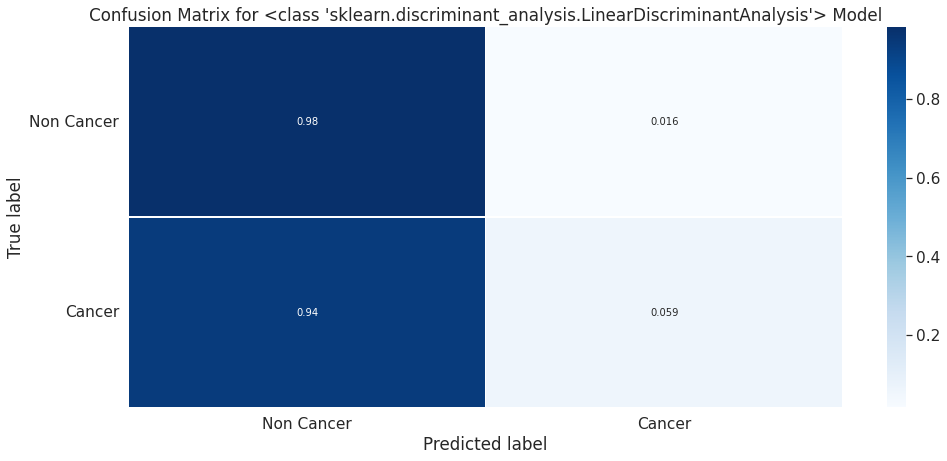

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
4

Index(['Age', 'Smokes_yrs', 'Hormonal_Contraceptives_years', 'IUD_years'], dtype='object')
F1Score: 0.10526315789473684


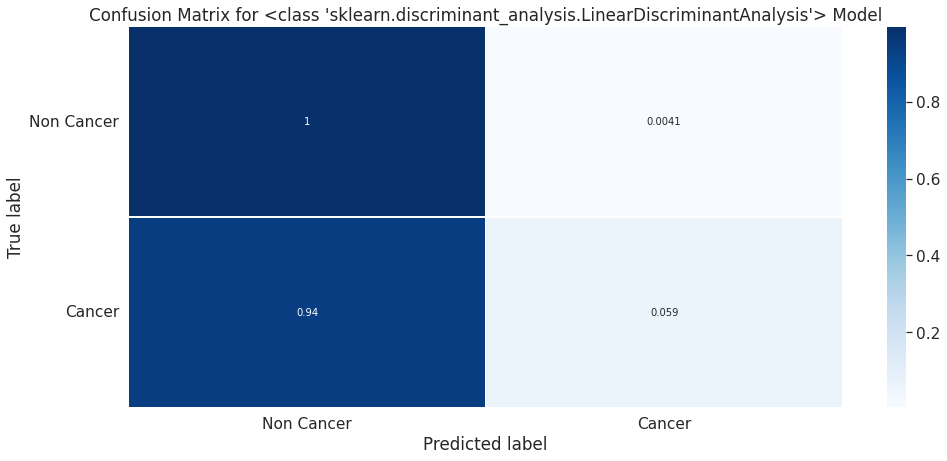

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
5

Index(['Age', 'No_pregnancies', 'Smokes_yrs', 'Hormonal_Contraceptives_years',
       'IUD_years'],
      dtype='object')
F1Score: 0.1111111111111111


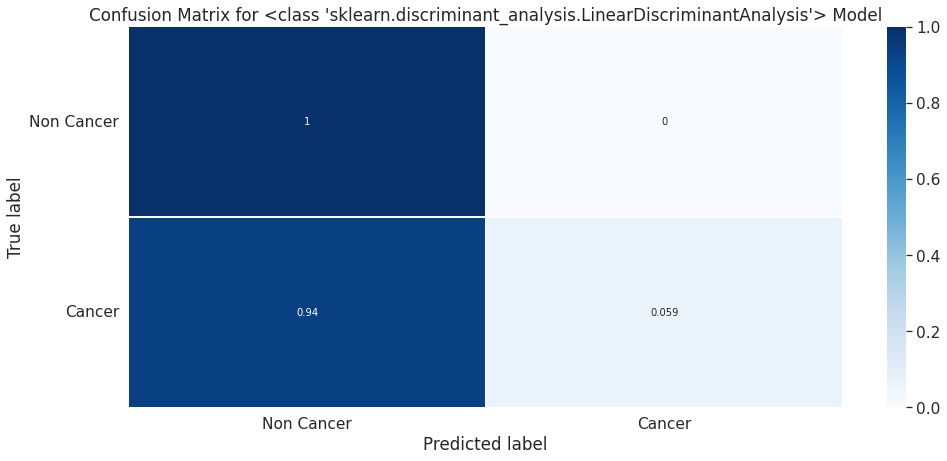

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
6

Index(['Age', 'No_pregnancies', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.1111111111111111


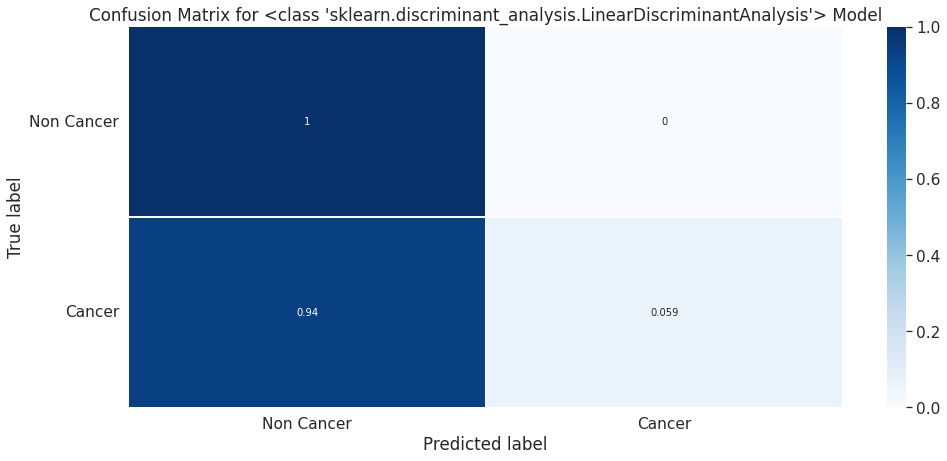

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
7

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Smokes_packs_yr', 'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.1111111111111111


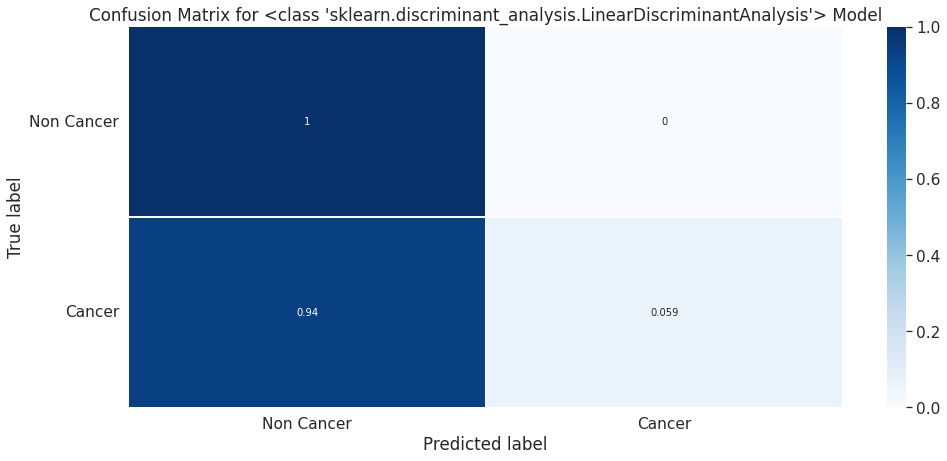

<class 'sklearn.linear_model._perceptron.Perceptron'>
5

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Hormonal_Contraceptives_years'],
      dtype='object')
F1Score: 0.1


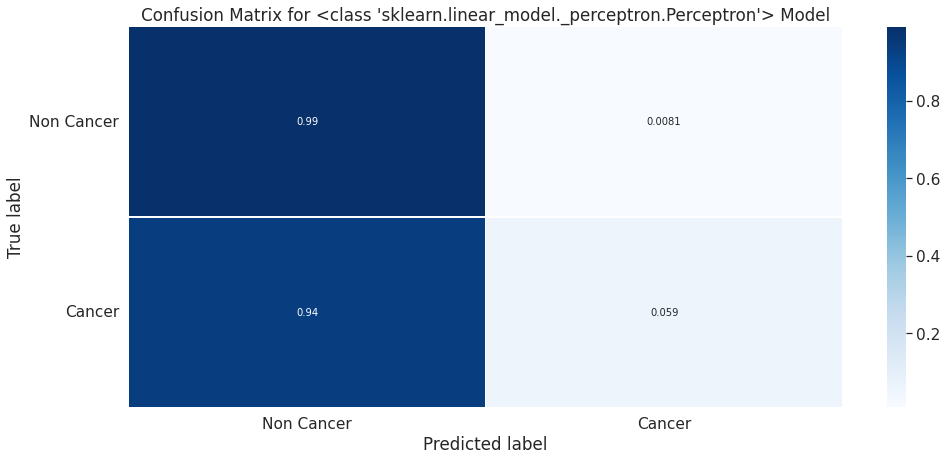

<class 'sklearn.linear_model._perceptron.Perceptron'>
6

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.1


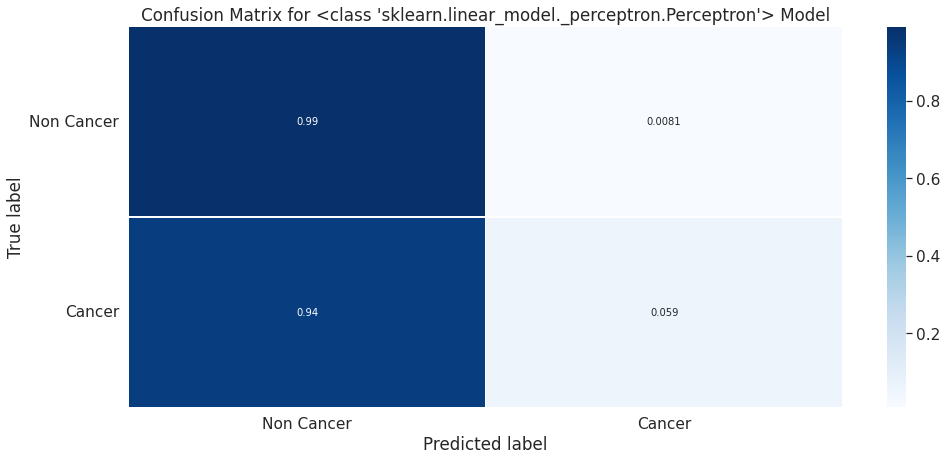

<class 'sklearn.linear_model._ridge.RidgeClassifier'>
2

Index(['Age', 'IUD_years'], dtype='object')
F1Score: 0.0909090909090909


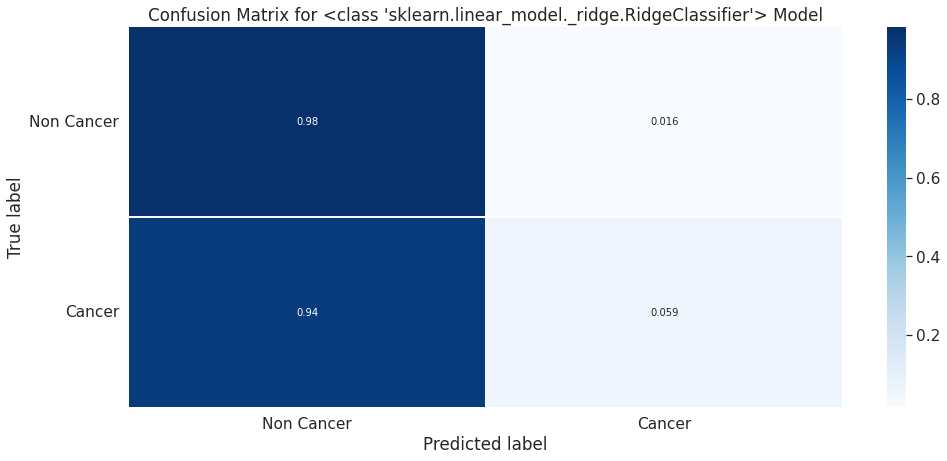

<class 'sklearn.linear_model._ridge.RidgeClassifier'>
4

Index(['Age', 'Smokes_yrs', 'Hormonal_Contraceptives_years', 'IUD_years'], dtype='object')
F1Score: 0.10526315789473684


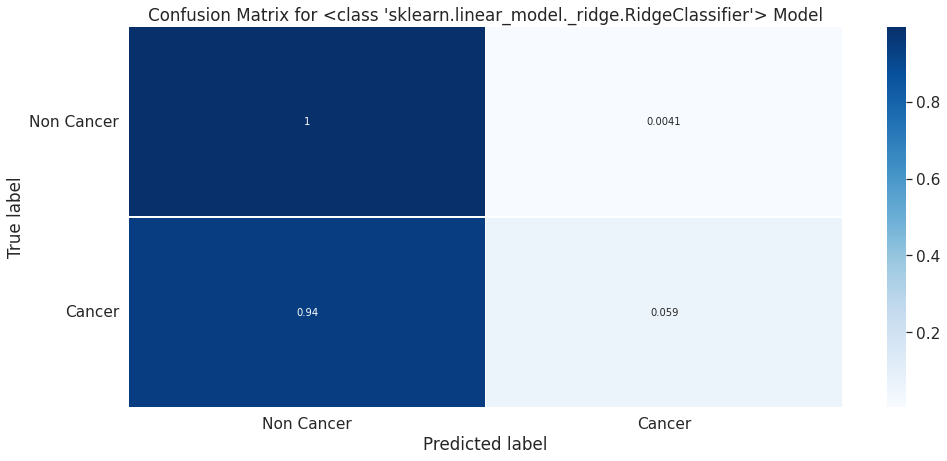

<class 'sklearn.linear_model._ridge.RidgeClassifier'>
5

Index(['Age', 'No_pregnancies', 'Smokes_yrs', 'Hormonal_Contraceptives_years',
       'IUD_years'],
      dtype='object')
F1Score: 0.1111111111111111


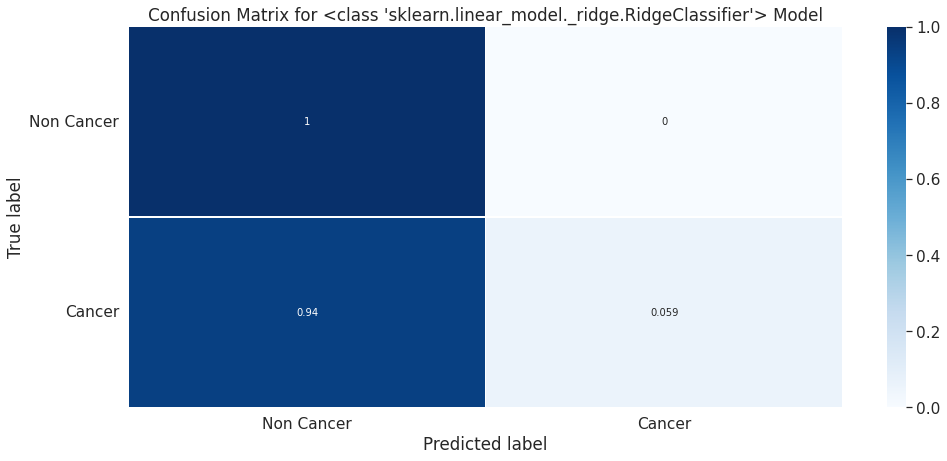

<class 'sklearn.linear_model._ridge.RidgeClassifier'>
6

Index(['Age', 'No_pregnancies', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.1111111111111111


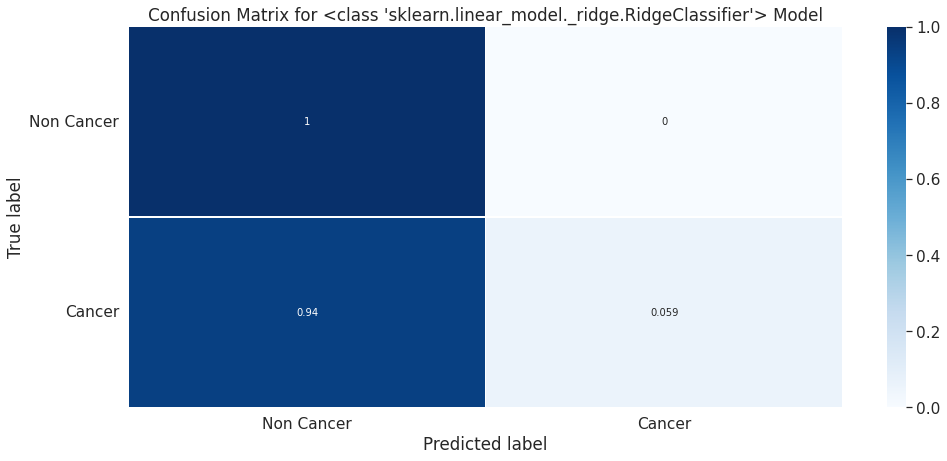

<class 'sklearn.linear_model._ridge.RidgeClassifier'>
7

Index(['Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_yrs',
       'Smokes_packs_yr', 'Hormonal_Contraceptives_years', 'IUD_years'],
      dtype='object')
F1Score: 0.1111111111111111


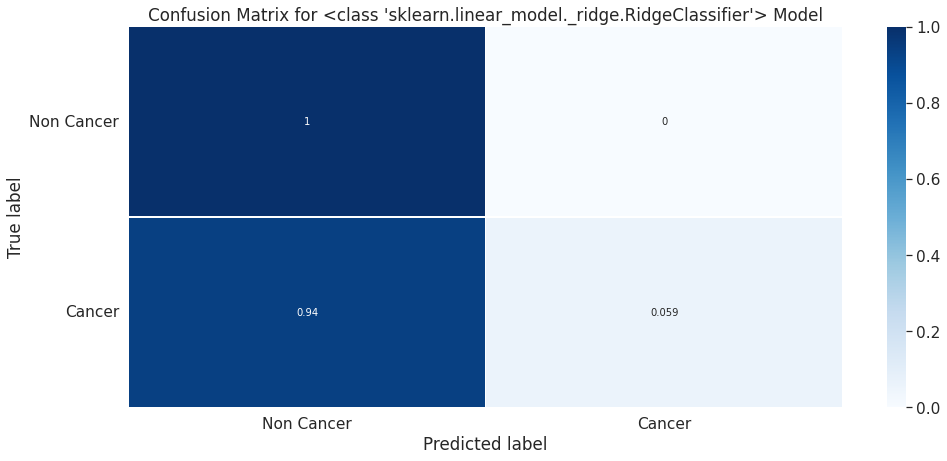

NearestCentroid()
all_features

F1Score: 0.10526315789473684


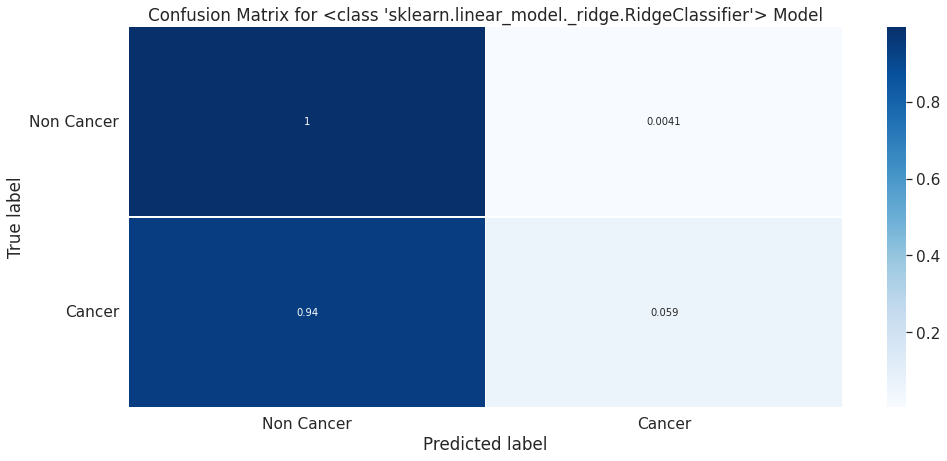

In [ ]:
models = [LinearDiscriminantAnalysis, ExtraTreesClassifier, DecisionTreeClassifier, Perceptron, SGDClassifier, RidgeClassifier]

for classifier in models:
    for nbr_features in range(2, 8):
        selector = RFE(classifier(), n_features_to_select=nbr_features)
        selector.fit(X_train_sp, y_train)
        y_pred = selector.predict(X_test_sp)
        f1_score = metrics.f1_score(y_test, y_pred)
        if f1_score > 0:
            print(f"{classifier}\n{nbr_features}\n")
            print(X_train.columns[selector.support_])
            print(f"F1Score: {f1_score}")

            # Get and reshape confusion matrix data
            matrix=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
            matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

            # Build the plot
            plt.figure(figsize=(16,7))
            sns.set(font_scale=1.4)
            sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                        cmap=plt.cm.Blues, linewidths=0.2)

            # Add labels to the plot
            class_names = ['Non Cancer', 'Cancer']
            tick_marks = np.arange(len(class_names)) + 0.5
            plt.xticks(tick_marks, class_names, rotation=0)
            plt.yticks(tick_marks, class_names, rotation=0)
            plt.xlabel('Predicted label')
            plt.ylabel('True label')
            plt.title(f'Confusion Matrix for {classifier} Model')
            plt.show()

selector = NearestCentroid()
selector.fit(X_train_sp, y_train)
y_pred = selector.predict(X_test_sp)
f1_score = metrics.f1_score(y_test, y_pred)
if f1_score > 0:
    print(f"NearestCentroid()\nall_features\n")
    print(f"F1Score: {f1_score}")

    # Get and reshape confusion matrix data
    matrix=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
    matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Blues, linewidths=0.2)

    # Add labels to the plot
    class_names = ['Non Cancer', 'Cancer']
    tick_marks = np.arange(len(class_names)) + 0.5
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {classifier} Model')
    plt.show()

selector = SVC()
selector.fit(X_train_sp, y_train)
y_pred = selector.predict(X_test_sp)
f1_score = metrics.f1_score(y_test, y_pred)
if f1_score > 0:
    print(f"SVC()\nall_features\n")
    print(f"F1Score: {f1_score}")

    # Get and reshape confusion matrix data
    matrix=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
    matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Blues, linewidths=0.2)

    # Add labels to the plot
    class_names = ['Non Cancer', 'Cancer']
    tick_marks = np.arange(len(class_names)) + 0.5
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {classifier} Model')
    plt.show()